### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

> The NHS, a publicly funded healthcare system in England, contracted the data analysis company 4data to investigate why patients miss general practitioner (GP) appointments. Missed GP appointments lead to significant costs for the NHS. The goal is to investigate the problem via a data-informed approach to better understand the reason for missed appointments and to decide how to best handle the problem
[(GP Practice News 2022)](https://practiceindex.co.uk/gp/blog/news-prime-minister-candidate-wants-to-charge-no-show-patients/).    


# Assignment activity 1: Prepare your GitHub repository

### Insert proof of your GitHub repository

# My GitHub repository.
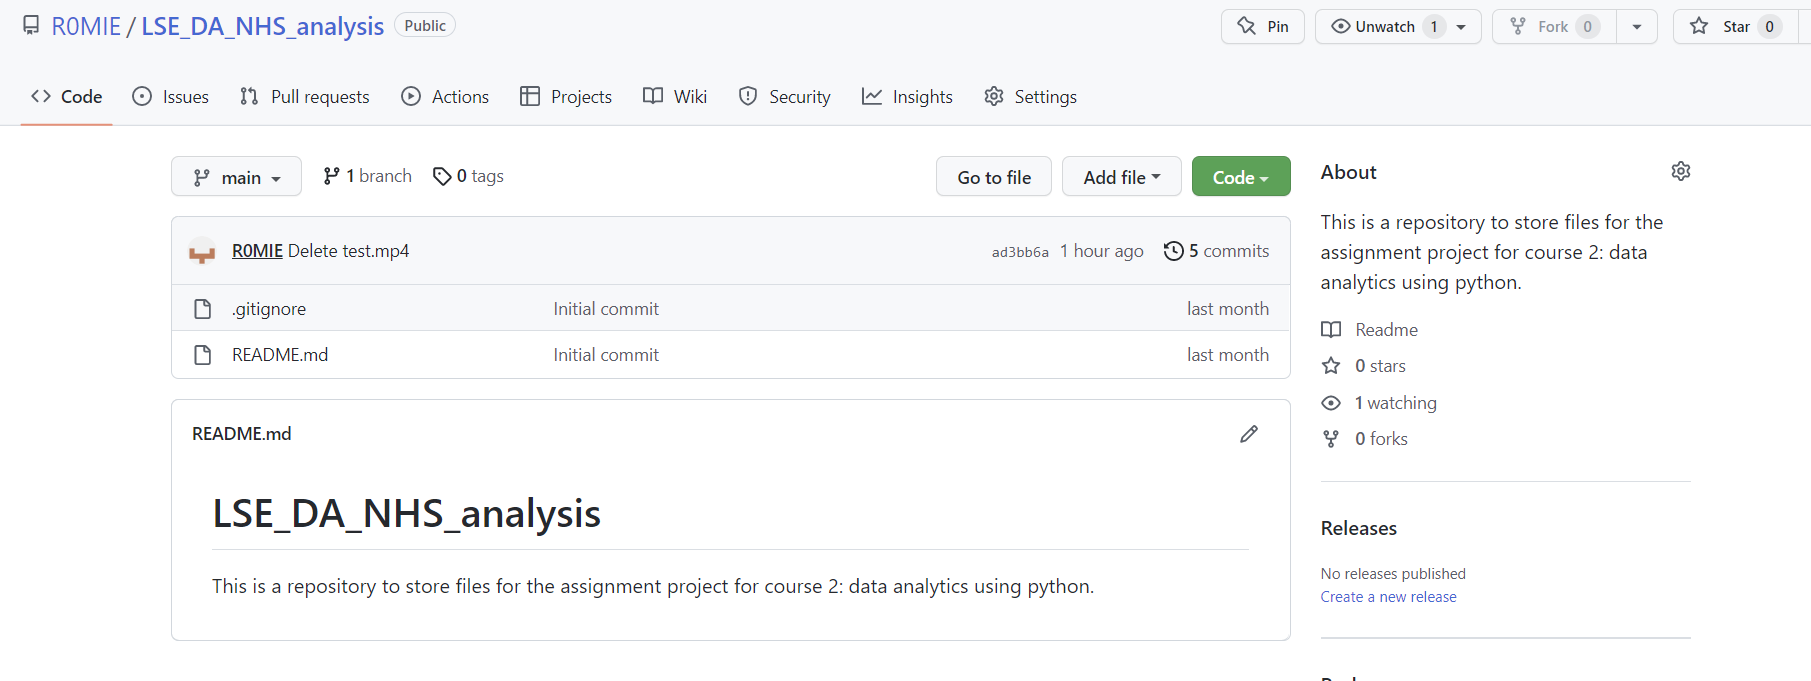

# Assignment activity 2: Import and explore the data
 >  **This section explores the following:**  
 > - Preparing the workstation
 > - Importing and sense-checking 3 data sets (actual_duration.csv, appointments_regional.csv, national_categories.xlsx)
 > - What is the number of locations?
 > - What are the 5 locations with the highest number of records?
 > - What is the number of service settings?
 > - What is the number of context types?
 > - What is the number of national categories?
 > - What is the number of appointment statuses?


### Prepare your workstation

In [1]:
# Import the necessary libraries for this workbook: Pandas and NumPy. 
import pandas as pd
import numpy as np

# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the necessary libraries for visualisations: Pandas and Seaborn. 
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Set the maximum column width to display.
pd.options.display.max_colwidth = 200

In [3]:
# Import additional optional libraries for visualisations.
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

### Import and sense-check the actual_duration.csv data set

In [4]:
# Import the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [5]:
# Determine number of rows and columns. 
print(ad.shape)

(137793, 8)


The actual duration data set has 8 columns and 137793 rows.

In [6]:
# Use a docstring to determine the column names.
print(f"The column names of the ad data set are: {ad.columns}")

The column names of the ad data set are: Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')


In [7]:
# Determine whether there are missing values.
ad.isna().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

There are no missing values in the data set.

In [8]:
# Determine the metadata of the data set (including data types).
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


Out of overall 8 columns of the actual duration data set, 7 columns contain object data types and 1 column contains an integer data type. Further metadata such as class, memory usage, and range index is displayed above too. 

In [9]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


The descriptive statistics displayed above provide info about the count, mean, standard deviation (std), minimum and maximum values (min, max), as well IQR values (25%, 50%, 75%) of the actual duration data set. 

### Import and sense-check the appointments_regional.csv data set

In [10]:
# Import the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [11]:
# Determine the number of rows and columns.
print(ar.shape)

(596821, 7)


The appointments regional data set has 7 columns and 596821 rows.

In [12]:
# Use a docstring to determine the column names.
print(f"The column names of the appointments regional data set are: {ar.columns}.")

The column names of the appointments regional data set are: Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object').


In [13]:
# Determine whether there are missing values.
ar.isna().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

There are no missing values in the data set.

In [14]:
# Determine the metadata of the data set.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


Out of overall 7 columns of the appointments regional data set, 6 columns contain object data types and 1 column contains an integer data type. Further metadata such as class, memory usage, and range index is displayed above too. 

In [15]:
# Determine the descriptive statistics of the data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


The descriptive statistics displayed above provide info about the count, mean, standard deviation (std), minimum and maximum values (min, max), as well IQR values (25%, 50%, 75%). 

### Import and sense-check the national_categories.xlsx data set

In [16]:
# Import the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [17]:
# Determine the number of rows and columns.
print(nc.shape)

(817394, 8)


The national categories data set has 8 columns and 817394 rows.

In [18]:
# Use a docstring to determine the column names.
print(f"The column names of the national categories data set are: {nc.columns}.")

The column names of the national categories data set are: Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object').


In [19]:
# Determine whether there are missing values.
nc.isna().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

There are no missing values in the data set.

In [20]:
# Determine the metadata of the data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


Out of overall 8 columns of the national categories data set, 6 columns contain object data types, 1 column contains an integer data type, and 1 column contains a datetime data type. Further metadata such as class, memory usage, and range index is displayed above too. 

In [21]:
# Determine the descriptive statistics of the data set.
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


The descriptive statistics displayed above provide info about the count, mean, standard deviation (std), minimum and maximum values (min, max), as well IQR values (25%, 50%, 75%) of the national categories data set. 

Text(0.5, 1.0, 'Number of appointments by service setting')

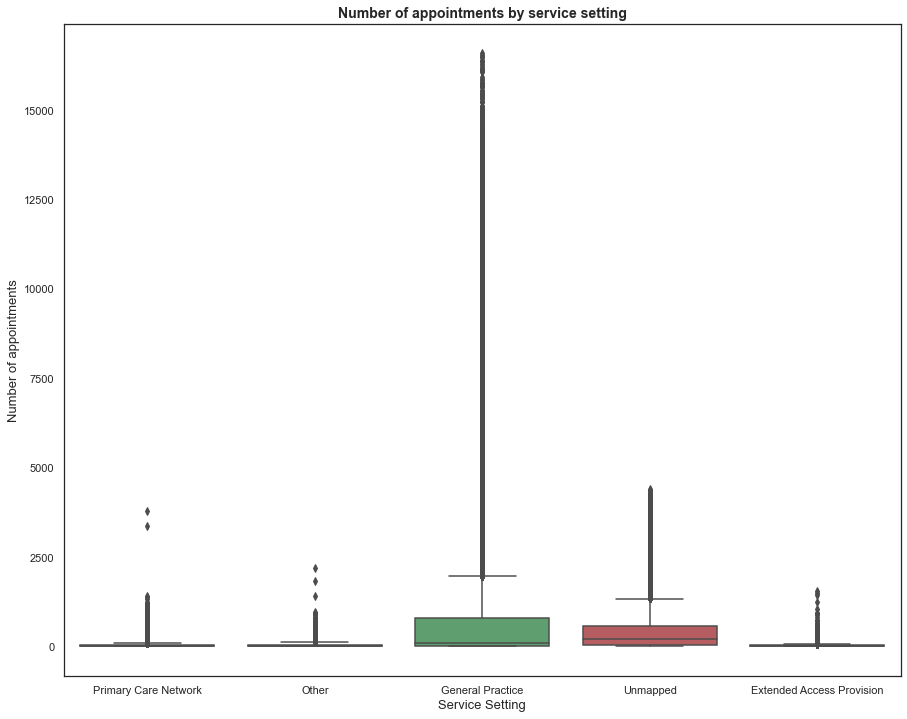

In [22]:
# Create a boxplot to investigate the spread of service settings in the nc data set.
# This servves as an example of outlier analysis.
sns.boxplot(data=nc, x='service_setting', y='count_of_appointments')

# Set axis labels and font styles.
plt.xlabel('Service Setting', size=13)
plt.ylabel('Number of appointments', size=13)
plt.title('Number of appointments by service setting', size=14, weight=600)

The decision was made to keep the outliers to preserve the integrity of the data set and to allow for more granular insights especially on General Practice data, which presents the largest amount of outliers in the boxplot above and is of major interest to the stakeholders (NHS). 

### Explore the data set

**Question 1:** How many locations are there in the data set?

In [23]:
# Determine the number of locations using the len() and value_counts() functions. 
num_locations = len(nc['sub_icb_location_name'].value_counts())

# Use a docstring to display the results. 
print(f"There are {num_locations} locations in the data set.")

There are 106 locations in the data set.


This information helps to understand the geographical coverage of the data set. 

**Question 2:** What are the five locations with the highest number of records?



In [24]:
# Determine the top five locations based on record count.
top_locations = nc['sub_icb_location_name'].value_counts()
print(top_locations.head().to_frame())

                                             sub_icb_location_name
NHS North West London ICB - W2U3Z                            13007
NHS Kent and Medway ICB - 91Q                                12637
NHS Devon ICB - 15N                                          12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V                  12171
NHS North East London ICB - A3A8R                            11837


In [25]:
# Use a docstring to display the results. 
print(f"The top five locations are: {list(top_locations.index[:5])}.")

The top five locations are: ['NHS North West London ICB - W2U3Z', 'NHS Kent and Medway ICB - 91Q', 'NHS Devon ICB - 15N', 'NHS Hampshire and Isle Of Wight ICB - D9Y0V', 'NHS North East London ICB - A3A8R'].


Learning about the top five locations in terms of record counts will become relevant for business recommendations, as it is likely that interventions focused on these locations will be impactful, for example ensuring that data entry policies are respected to avoid unmapped entries. 

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [26]:
# Determine the number of service settings using the len() and value_counts() functions. 
service_settings = len(nc['service_setting'].value_counts())

# Use a docstring to display the results. 
print(f"There are {service_settings} service settings.")

There are 5 service settings.


In [27]:
# Determine the number of context types using the len() and value_counts() functions. 
context_types = len(nc['context_type'].value_counts())

# Use a docstring to display the results. 
print(f"There are {context_types} context types.")

There are 3 context types.


In [28]:
# Determine the number of national categories using the len() and value_counts() functions. 
national_cat = len(nc['national_category'].value_counts())

# Use a docstring to display the results. 
print(f"There are {national_cat} national categories.")

There are 18 national categories.


In [29]:
# Determine the number of appointment statuses using the len() and value_counts() functions. 
appointment_status = len(ar['appointment_status'].value_counts())

# Use a docstring to display the results. 
print(f"There are {appointment_status} appointment statuses.")

There are 3 appointment statuses.


This section helped to get a first impression of the data in preparation for more detailed analysis below.

# Assignment activity 3: Analyse the data

 >  **This section explores the following questions:** 
 > - Between what dates were appointments scheduled?
 > - Which service setting reported the most appointments in North West London from 1 January to 1 June 2022?
 > - Which month had the highest number of appointments?
 > - What is the number of appointments and records per month?

**Question 1:** Between what dates were appointments scheduled? 

In [30]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad['appointment_date'].head()

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

The date format is object.

In [31]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

The date format is datetime.

In [32]:
# Change the format of ad['appointment_date'] column to date.
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DataFrame.
ad['appointment_date'].head()

0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]

The date format is successfully changed to datetime.

In [33]:
# Determine the minimum and maximum dates in the ad DataFrame.
ad_earliest_date = ad['appointment_date'].min().strftime("%d %B %Y")
ad_latest_date = ad['appointment_date'].max().strftime("%d %B %Y")


# Use appropriate docstrings to display the results.
print(f" In the ad DataFrame, the appointments were scheduled between {ad_earliest_date} and {ad_latest_date}.")

 In the ad DataFrame, the appointments were scheduled between 01 December 2021 and 30 June 2022.


In [34]:
# Determine the minimum and maximum dates in the nc DataFrame.
nc_earliest_date = nc['appointment_date'].min().strftime("%d %B %Y")
nc_latest_date = nc['appointment_date'].max().strftime("%d %B %Y")

# Use appropriate docstrings to display the results.
print(f"In the nc DataFrame, the appointments were scheduled between {nc_earliest_date} and {nc_latest_date}.")

In the nc DataFrame, the appointments were scheduled between 01 August 2021 and 30 June 2022.


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [35]:
# Create subset of the nc DataFrame.
# Use the sub_icb_location code of NHS North West London ICB - W2U3Z.
# Specify the date of appointments as 1 January 2022 to 1 June 2022.
nc_sub = nc.loc[
    (nc['sub_icb_location_name']=='NHS North West London ICB - W2U3Z') &
    (nc['appointment_date']>='2022-01-01') & 
    (nc['appointment_date']<='2022-06-01')]
 
# View the output.
nc_sub.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
800289,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,496,2022-01
800290,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Clinical Triage,19,2022-01
800291,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Other,Inconsistent Mapping,Inconsistent Mapping,1,2022-01
800292,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,16,2022-01
800293,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Planned Clinics,29,2022-01


In [36]:
# For each of these service settings, determine the number of records available for the period and the location. 
pop_ss = nc_sub.groupby(['service_setting']).sum().sort_values(by=['count_of_appointments'],ascending=False)

# View the output.
pop_ss

,count_of_appointments
service_setting,
General Practice,4804239
Unmapped,391106
Other,152897
Primary Care Network,109840
Extended Access Provision,98159


The service setting "General Practice" reports most appointments in North West London from 1 January to 1 June 2022. While this info is limited in terms of location (only 1 location) and time span (January to June 2022), the fact that General Practice reports the most appointments is highly relevant for the business problem of missed GP appointments and is a first indication to take a closer look at GP related data entries in subsequent sections. 

**Question 3:** Which month had the highest number of appointments?

In [37]:
# Use the groupby() and sort_values() functions.
# Create an new DataFrame. 
month_appoints = nc.groupby('appointment_month')[['count_of_appointments']].sum()\
.sort_values(by=['count_of_appointments'], ascending=False)

# View the output.
month_appoints

,count_of_appointments
appointment_month,
2021-11,30405070
2021-10,30303834
2022-03,29595038
2021-09,28522501
2022-05,27495508
2022-06,25828078
2022-01,25635474
2022-02,25355260
2021-12,25140776


November 2021 reported the highest number of overall appointments. At this stage of the analysis this is noted but no further conclusions are drawn. Potential contextual reasons for this are explored in the last section of the report when looking at covid-19 data that reports a stark increase in UK covid cases in November 2021. 

**Question 4:** What was the total number of records per month?

In [38]:
# Determine the total number of records per month using the value_counts() function.
# Use the to_frame() function to show the output in a DataFrame format.
nc['appointment_month'].value_counts().to_frame()

,appointment_month
2022-03,82822
2021-11,77652
2022-05,77425
2021-09,74922
2022-06,74168
2021-10,74078
2021-12,72651
2022-01,71896
2022-02,71769
2022-04,70012


The table above displays total number of records per month showing that March 2022 had the most and August 2021 the least number of records. After this initial numerical exploration, the following section focuses on visualising intital trends. 

# Assignment activity 4: Identify and visualise initial trends
 >  **This section identifies and visualises possible monthly and seasonal trends in the data:**
 > - Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.
 > - Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).


### Prepare the workstation

Note that seaborn and matplotlib libraries were imported at the beginning of the notebook. 

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [39]:
# List the columns of the nc DataFrame.
nc.columns

Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')

In [40]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc = nc.astype({'appointment_month':'string'})

# Show the data types to check whether changes were executed.
print(nc.dtypes)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                string
dtype: object


Changes were successfully executed. The apppointment_month column is displayed as string.

In [41]:
# Create a new DataFrame (nc_ss). 
# Use the groupby() function to group the monthly appointments and service settings for the nc DataFrame.
# Calculate the total number of appointments (sum).
# Reset the index.
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View output.
nc_ss.head(15)

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


**Service settings:**

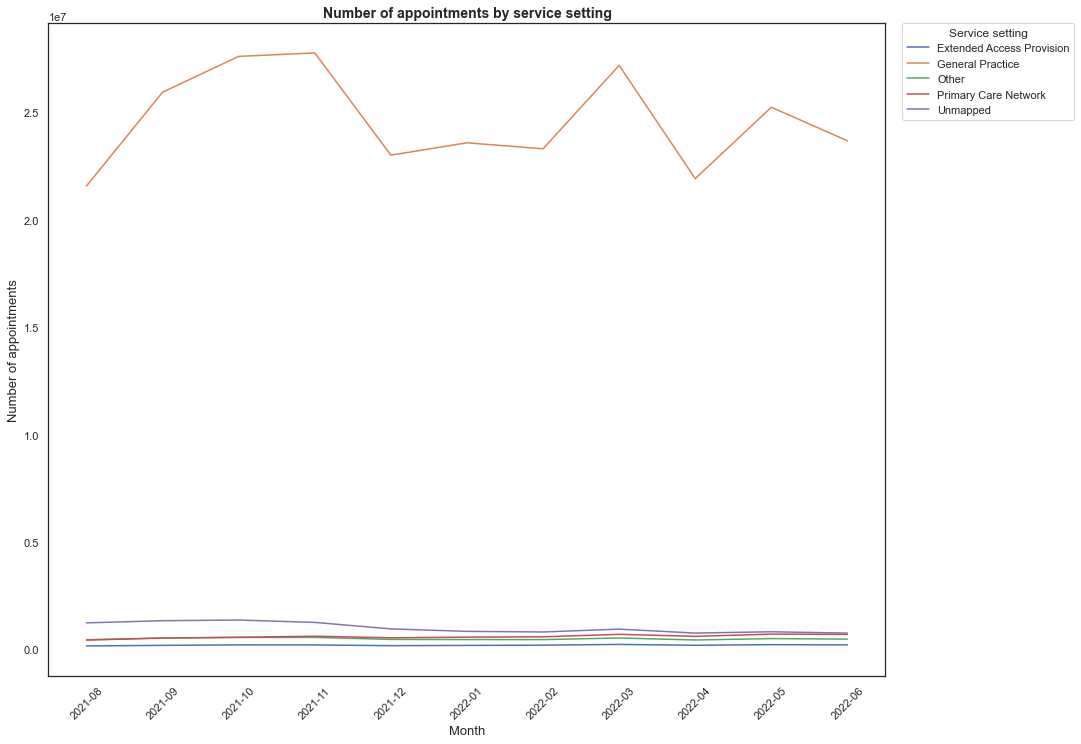

In [42]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
# Specify the x and y variables.
# Specify the hue and data. 
# Set ci=None.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_ss, ci=None)

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Number of appointments', size=13)
plt.title('Number of appointments by service setting', size=14, weight=600)

# Place legend outside the plot and add legend titles.
plt.legend(title='Service setting', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# Show the plot.
plt.show()

The visualisation shows that over the entire time span, General Practice displays the highest number of appointments. This further justifies that eliminating missed GP appointments could help the NHS to avoid significant costs.

**Context types:**

In [43]:
# Create a new DataFrame (nc_ct).
# Use the groupby() function to group the monthly appointments and context types.
# Calculate the total number of appointments (sum).
# Reset the index.
nc_ct = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()

# View the output.
nc_ct.head(15)

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135
5,2021-09,Unmapped,1336115
6,2021-10,Care Related Encounter,26125201
7,2021-10,Inconsistent Mapping,2811977
8,2021-10,Unmapped,1366656
9,2021-11,Care Related Encounter,26282778


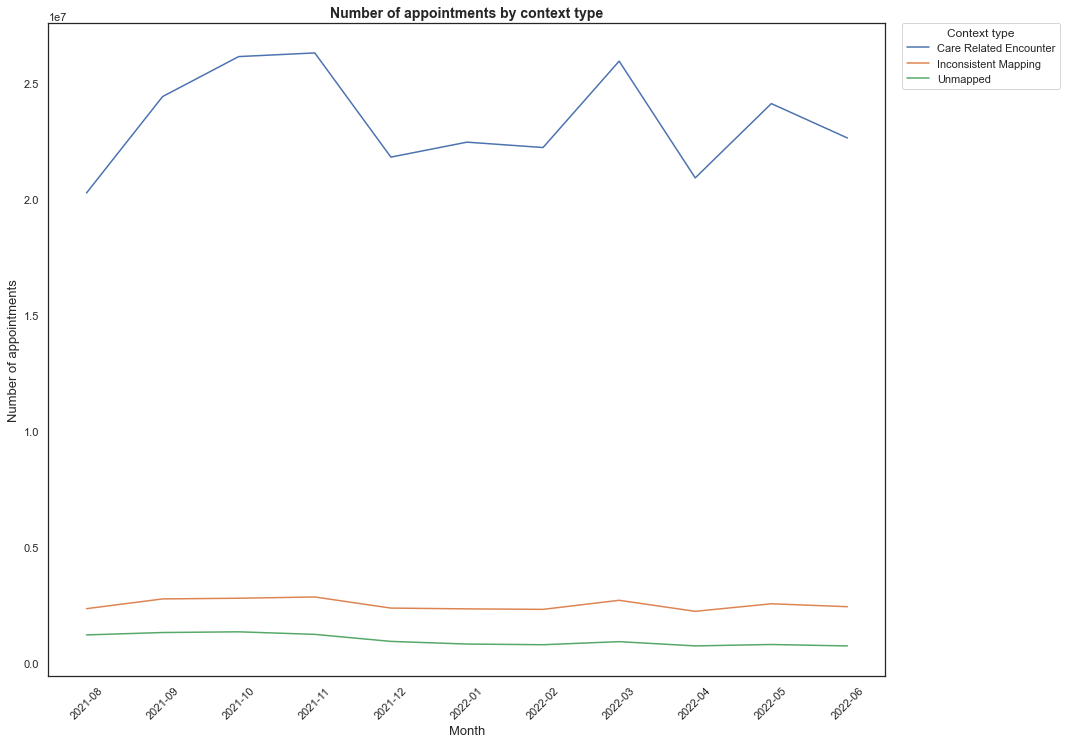

In [44]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
# Specify the x and y variables.
# Specify the hue and data. 
# Set ci=None.
sns.lineplot(x='appointment_month', y='count_of_appointments', data=nc_ct, hue='context_type', ci=None)

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Number of appointments', size=13)
plt.title('Number of appointments by context type', size=14, weight=600)

# Place legend outside the plot and add legend titles.
plt.legend(title='Context type', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# Show the plot.
plt.show()

Despite some fluctations across the time span, Care Related Encounters represent the dominant context type. For this analysis context types are not further investigated and the focus is set on service settings instead, as they provide info about GP appointments.

**National categories:**

In [45]:
# Create a separate DataFrame.
# Use the groupby() function to group the monthly appointments and national categories.
# Calculate the total number of appointments (sum).
# Reset the index.
nc_nc = nc.groupby(['appointment_month','national_category'])['count_of_appointments'].sum().reset_index()

# View output.
nc_nc.head(15)

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care and Support Planning,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045
5,2021-08,Group Consultation and Group Education,5161
6,2021-08,Home Visit,165061
7,2021-08,Inconsistent Mapping,2363093
8,2021-08,Non-contractual chargeable work,10775
9,2021-08,Patient contact during Care Home Round,31316


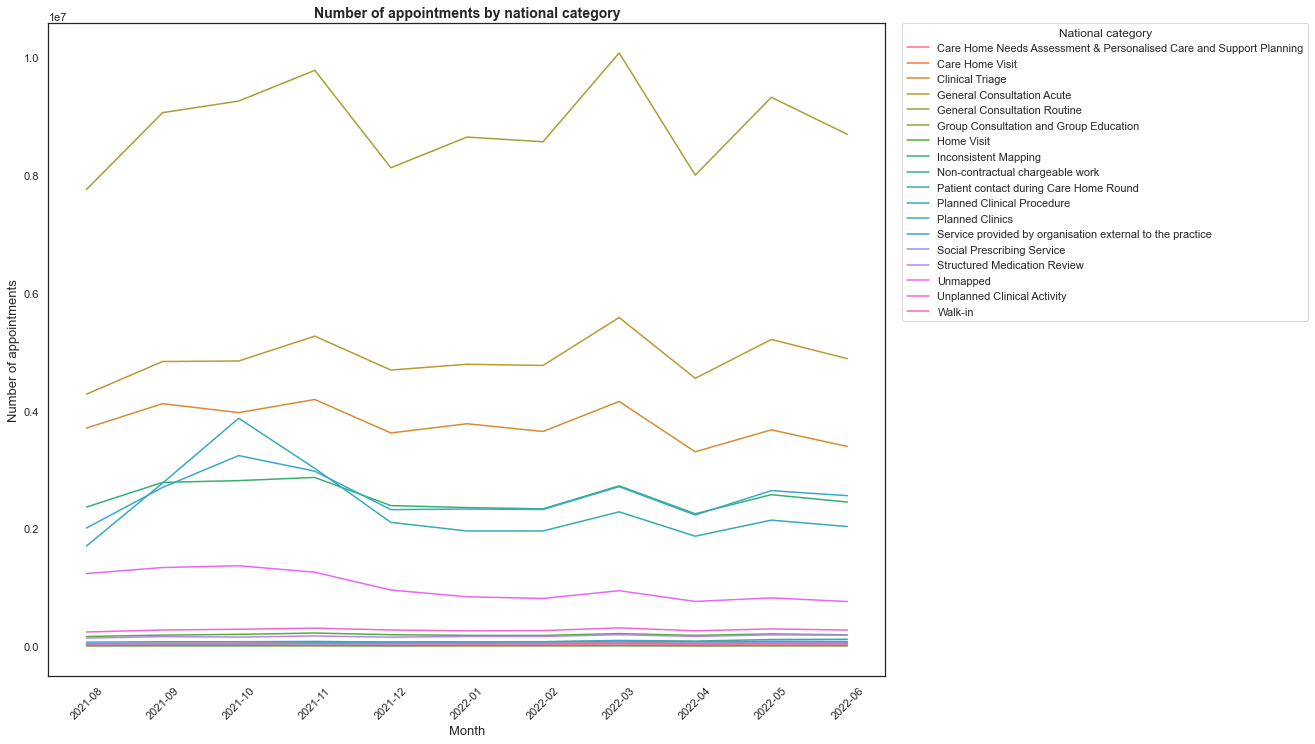

In [46]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
# Specify the x and y variables.
# Specify the hue and data. 
# Set ci=None.
sns.lineplot(x='appointment_month', y='count_of_appointments', data=nc_nc, hue='national_category', ci=None)

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Number of appointments', size=13)
plt.title('Number of appointments by national category', size=14, weight=600)

# Place legend outside the plot and add legend titles.
plt.legend(title='National category', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# Show the plot.
plt.show()

Decision: For this analysis national categories are not further investigated and the focus is set on service settings instead, as they provide info about GP appointments.

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [47]:
# Create a separate DataFrame (nc_2).
# Use the groupby() function to group the date of appointment, monthly appointments, and service settings.
# Calculate the total number of appointments (sum).
# Reset the index.
nc_2 = nc.groupby(['appointment_month', 'service_setting', 'appointment_date'])['count_of_appointments'].sum().reset_index()

# View output.
nc_2

,appointment_month,service_setting,appointment_date,count_of_appointments
0,2021-08,Extended Access Provision,2021-08-01,438
1,2021-08,Extended Access Provision,2021-08-02,7705
2,2021-08,Extended Access Provision,2021-08-03,7820
3,2021-08,Extended Access Provision,2021-08-04,6917
4,2021-08,Extended Access Provision,2021-08-05,6841
...,...,...,...,...
1665,2022-06,Unmapped,2022-06-26,443
1666,2022-06,Unmapped,2022-06-27,40314
1667,2022-06,Unmapped,2022-06-28,37777
1668,2022-06,Unmapped,2022-06-29,35745


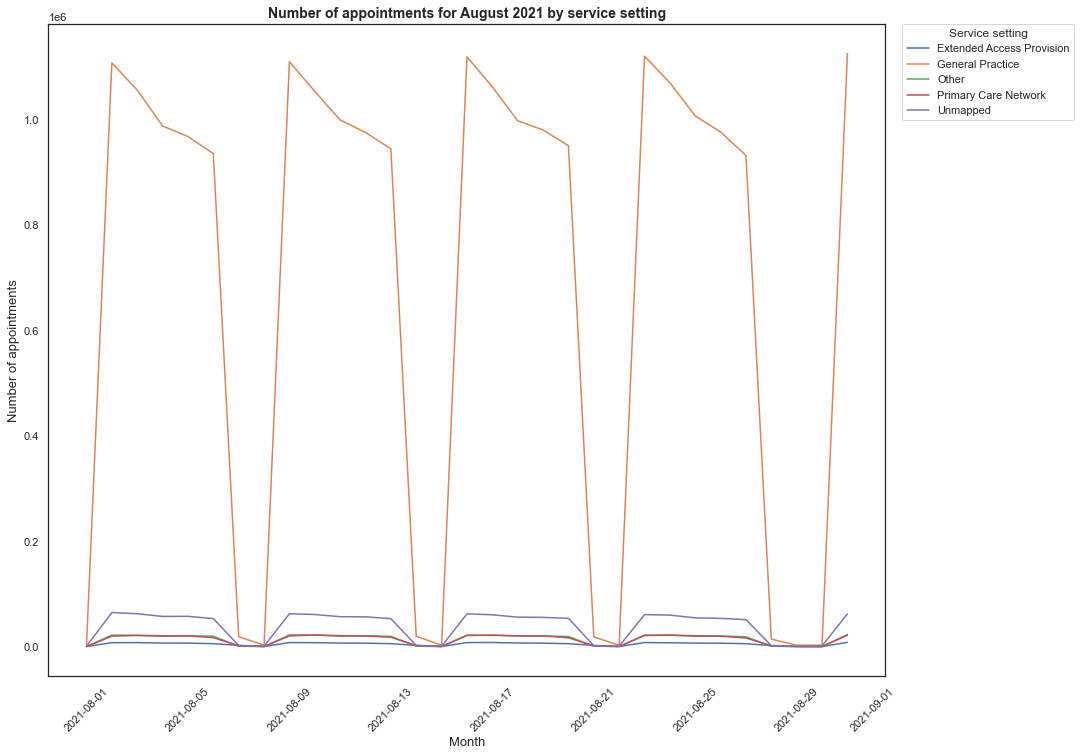

In [48]:
# Create a new DataFrame to filter the nc_2 DataFrame for August 2021 data.
nc_summer = nc_2.loc[(nc_2['appointment_month'] == '2021-08')]
nc_summer

# Create a lineplot.
# Specify the x and y variables.
# Specify the hue and data. 
# Set ci=None.
sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_summer, hue='service_setting', ci=None)

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Number of appointments', size=13)
plt.title('Number of appointments for August 2021 by service setting', size=14, weight=600)

# Place legend outside the plot and add legend titles.
plt.legend(title='Service setting', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

**Autumn (October 2021):**

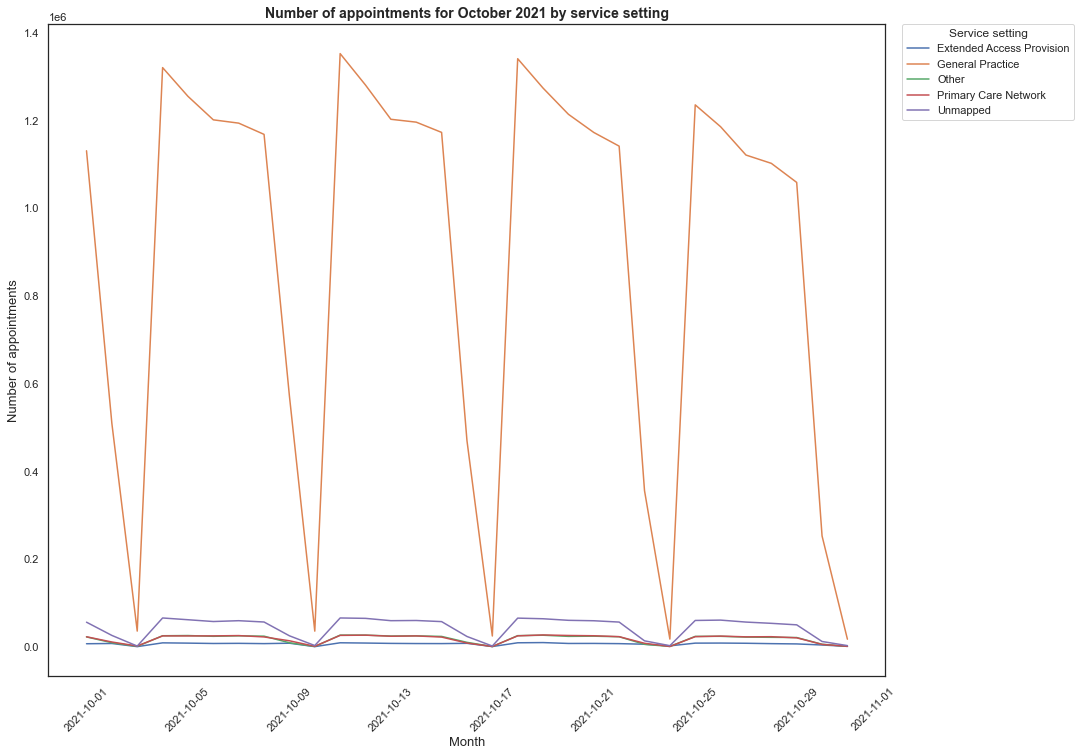

In [49]:
# Create a new data frame to filter for October 2021 data.
nc_autumn = nc_2.loc[(nc_2['appointment_month'] == '2021-10')]
nc_autumn

# Create a lineplot.
# Specify the x and y variables.
# Specify the hue and data. 
# Set ci=None.
sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_autumn, hue='service_setting', ci=None)

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Number of appointments', size=13)
plt.title('Number of appointments for October 2021 by service setting', size=14, weight=600)

# Place legend outside the plot and add legend titles.
plt.legend(title='Service setting', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

**Winter (January 2022):**

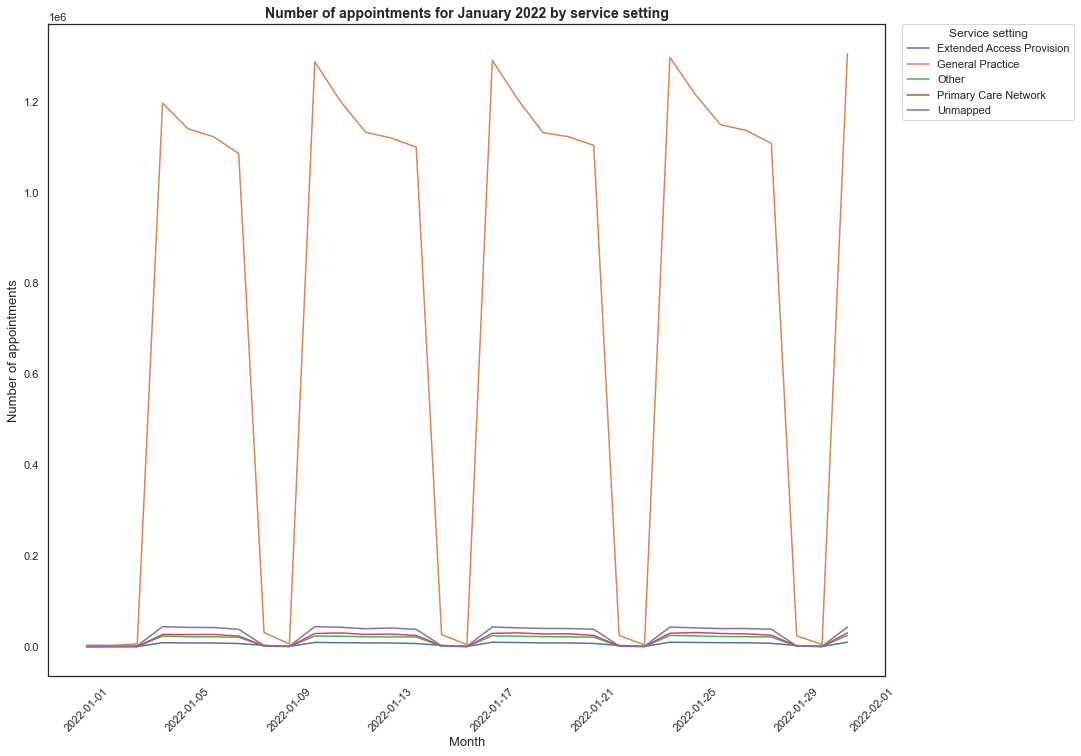

In [50]:
# Create a new data frame to filter for January 2021 data.
nc_winter = nc_2.loc[(nc_2['appointment_month'] == '2022-01')]
nc_winter

# Create a lineplot.
# Specify the x and y variables.
# Specify the hue and data. 
# Set ci=None.
sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_winter, hue='service_setting', ci=None)

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Number of appointments', size=13)
plt.title('Number of appointments for January 2022 by service setting', size=14, weight=600)

# Place legend outside the plot and add legend titles.
plt.legend(title='Service setting', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

**Spring (April 2022):**

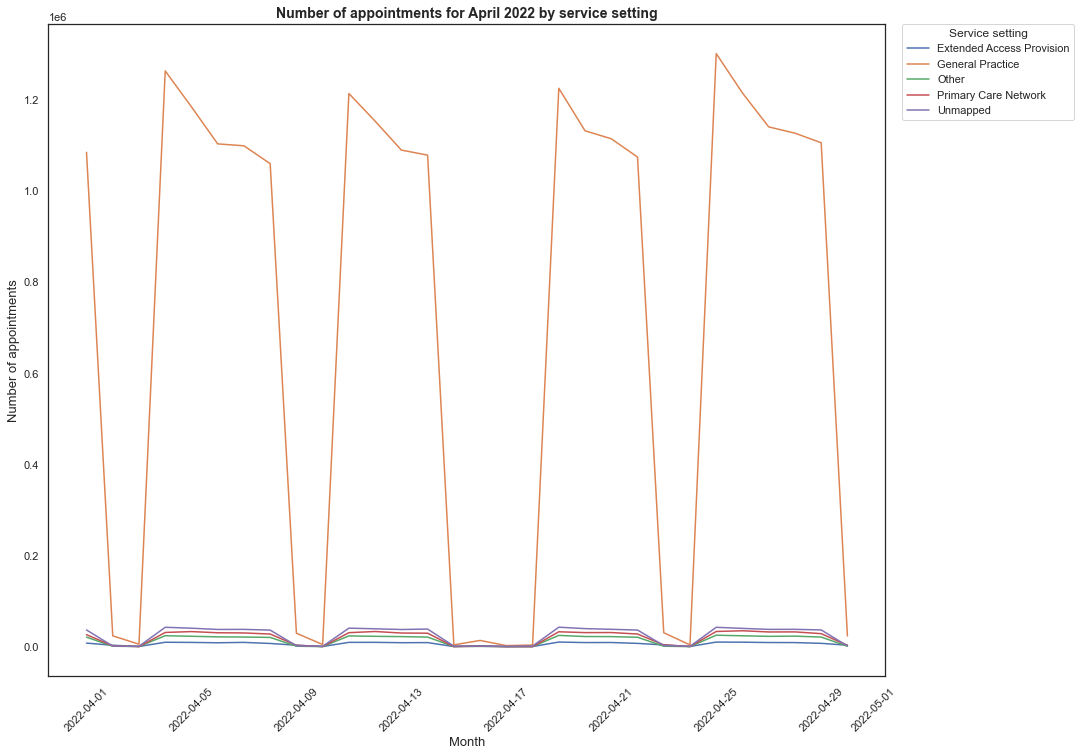

In [51]:
# Create a new data frame to filter for April 2022 data.
nc_spring = nc_2.loc[(nc_2['appointment_month'] == '2022-04')]
nc_spring

# Create a lineplot.
# Specify the x and y variables.
# Specify the hue and data. 
# Set ci=None.
sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_spring, hue='service_setting', ci=None)

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Number of appointments', size=13)
plt.title('Number of appointments for April 2022 by service setting', size=14, weight=600)

# Place legend outside the plot and add legend titles.
plt.legend(title='Service setting', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

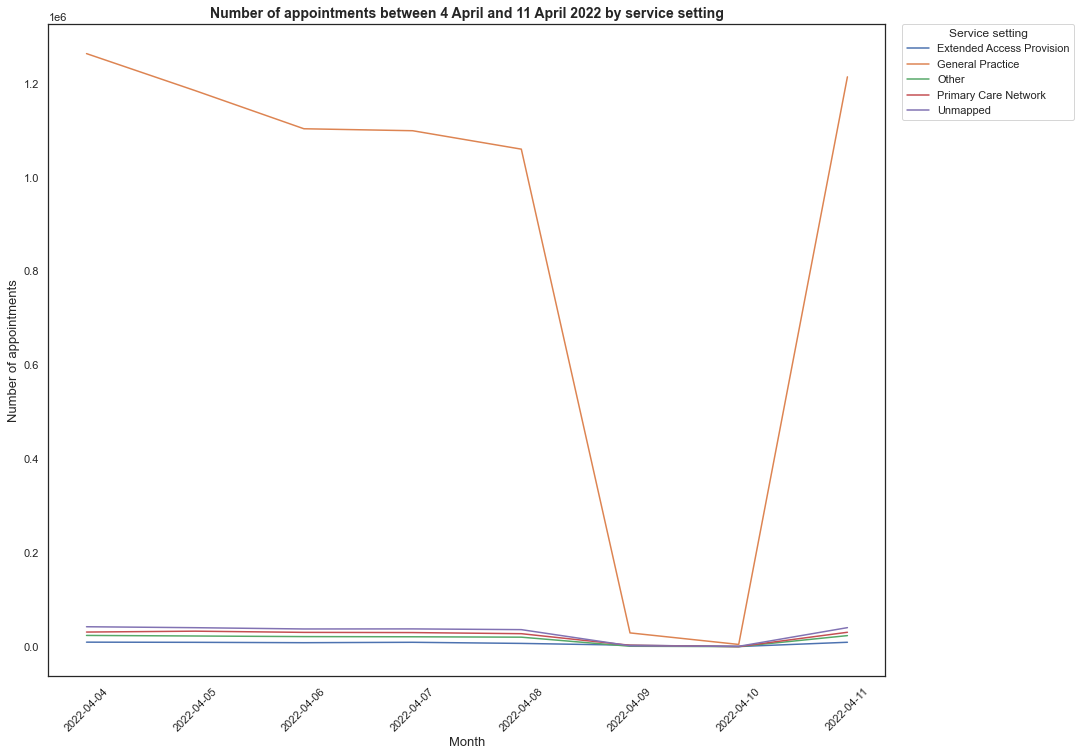

In [52]:
# Create a new data frame to filter for a week in April 2022.
nc_spring = nc_2.loc[(nc_2['appointment_month'] == '2022-04') &
    # Monday 4 April until Monday 11 April )
    (nc_2['appointment_date'] >= '2022-04-04') & 
    (nc_2['appointment_date'] <= '2022-04-11')]
nc_spring

# Create a lineplot.
# Specify the x and y variables.
# Specify the hue and data. 
# Set ci=None.
sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_spring, hue='service_setting', ci=None)

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Number of appointments', size=13)
plt.title('Number of appointments between 4 April and 11 April 2022 by service setting', size=14, weight=600)

# Place legend outside the plot and add legend titles.
plt.legend(title='Service setting', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

- Insights: Across all seasons, there is a significant decrease of appointments over the weekend, followed by a stark increase towards the beginning of the week that flattens out throughout the weekdays. Across all visualisations General Practice reports the highest number of appointments, which justifies further analysis of GP appointments.
- Limitations: It can be criticised that seasons are presented by only one month, which is not an accurate representation of a season and it seems unusual to choose January 2022 for plotting the winter seasons (December would have been expected).

# Assignment activity 5: Analyse the Twitter data related to UK healthcare
 >  **This section explores the following:** 
 > - Identify and review the top trending hashtags (#) related to healthcare in the UK based on the data set received from the NHS.
 > - Read the following article from [(Driver 2022)](https://www.businessnewsdaily.com/7488-twitter-for-business.html) and determine how teams can use tweets to provide feedback to stakeholders, whether tweets add value to the overall project, and how the NHS can utilise tweets.

Please note that the respective libraries were imported at the beginning of the notebook.

In [53]:
# Load the tweets.csv file and create a new DataFrame named tweets.
tweets = pd.read_csv('tweets.csv')

# Print the DataFrame to determine the first five rows.
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [54]:
# Explore the data set with the describe() function.
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


The descriptive statistics displayed above provide info about the count, mean, standard deviation (std), minimum and maximum values (min, max), as well IQR values (25%, 50%, 75%).

In [55]:
# Explore the data set with the info() function.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


Out of overall 10 columns, thre are 3 boolean columns, 3 integer columns, and 5 object columns. 

In [56]:
# Explore the tweet_favorite_count column with the value_counts() function.
tweets['tweet_favorite_count'].value_counts(ascending=False).to_frame()

,tweet_favorite_count
0,1027
1,91
2,16
3,13
4,7
5,5
6,2
17,1
12,1
10,1


In [57]:
# Explore the tweet_retweet_count column with the value_counts() function.
tweets['tweet_retweet_count'].value_counts(ascending=False).to_frame()

,tweet_retweet_count
0,526
1,215
2,114
3,70
5,35
4,27
7,18
12,16
8,15
73,14


There is value in lookint at the tweet_retweet_count and tweet_favorite_count columns in greater detail as serve as indicator of trends in public opinions and topics of interest. However, as this data set is relatively small (1173 entries), the decision was taken to look at trending hashtags instead. See analysis below.

In [58]:
# Use the tweets_text column to create a new DataFrame with only text values. 
tweets_text = tweets.loc[:, ['tweet_full_text']]

# View the DataFrame.
tweets_text

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."
...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…
1170,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie..."
1171,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp..."
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC


In [59]:
# Create a variable (tags,) and assign an empty list to it.
tags = []
# Loop through the messages, and create a list of values containing the # symbol.
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

In [60]:
# Show the list.
tags

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare',
 '#healthcare',
 '❤️\n\n#healthcare',
 '#healthcare',
 '#hcldr',
 '#premisehealth',
 '#hiring',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '#qualitypatientcare',
 '#jobs',
 '#job',
 '#ascp2022',
 '#ascp100.',
 '#healthcare',
 '#healthsecretary',
 '#healthcare',
 '#ai,',
 '#sdoh,',
 '#healthcare',
 '\nhttps://t.co/ewe7jntj1e\n#tropicana',
 '#real',
 '#juice',
 '#healthcare',
 '#watch',
 '#worms',
 '#fruits',
 '#healthtips',
 '#tips',

In [61]:
# Create a Pandas Series to count the values in the list. Set the Series equal to tags.
# Display the first 30 records.
x = pd.Series(tags)
x.head(30)

0                                    #healthcare
1                                 #premisehealth
2                                        #hiring
3                                    #healthcare
4                                        🚨#new:🚨
5                                look!\n\n#blogs
6                         #digitaltransformation
7                                 #cybersecurity
8                                    #accounting
9                                       #finance
10                                   #healthcare
11    https://t.co/jrgqeqdme4\n.\n#firstcoastcna
12                                      #cnaexam
13                           #cnaexampreparation
14                                 #jacksonville
15                                  #cnatraining
16                                        #nurse
17                                      #nursing
18                                    #nurselife
19                            #nursepractitioner
20                  

In [62]:
# Convert the series to a DataFrame in preparation for visualisation.
# Reset the index.
hashtags = x.value_counts().to_frame().reset_index()

# View the DataFrame.
hashtags

,index,0
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1


In [63]:
# Rename the columns to word and count.
hashtags = hashtags.rename(columns={'index': 'word', 0: 'count'})
hashtags

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1


In [64]:
# Ensure the count data type is an integer for data analysis.
# Sense-check the DataFrame.
print(hashtags.shape)
print(hashtags.dtypes)


(1754, 2)
word     object
count     int64
dtype: object


In [65]:
# Display records where the count is larger than 15 to reduce the size of the plot. 
hashtags_short = hashtags.loc[
    (hashtags['count'] > 15)]
hashtags_short

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


In [66]:
# Remove any overrepresented hashtags.
hashtags_subset = hashtags_short[(hashtags_short.word != '#healthcare') &
                                 (hashtags_short.word != '#healthcare.') &
                                 (hashtags_short.word != '#health') &
                                 (hashtags_short.word != '#medicine') &
                                 (hashtags_short.word != '#medical') &
                                 (hashtags_short.word != '#job')]    
# View the DataFrame.
hashtags_subset

,word,count
3,#ai,40
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25
10,#marketing,25
11,#medtwitter,24
12,#biotech,24
13,#competitiveintelligence,24
14,#meded,23


Text(0.5, 1.0, 'Most frequently used hashtas (#)')

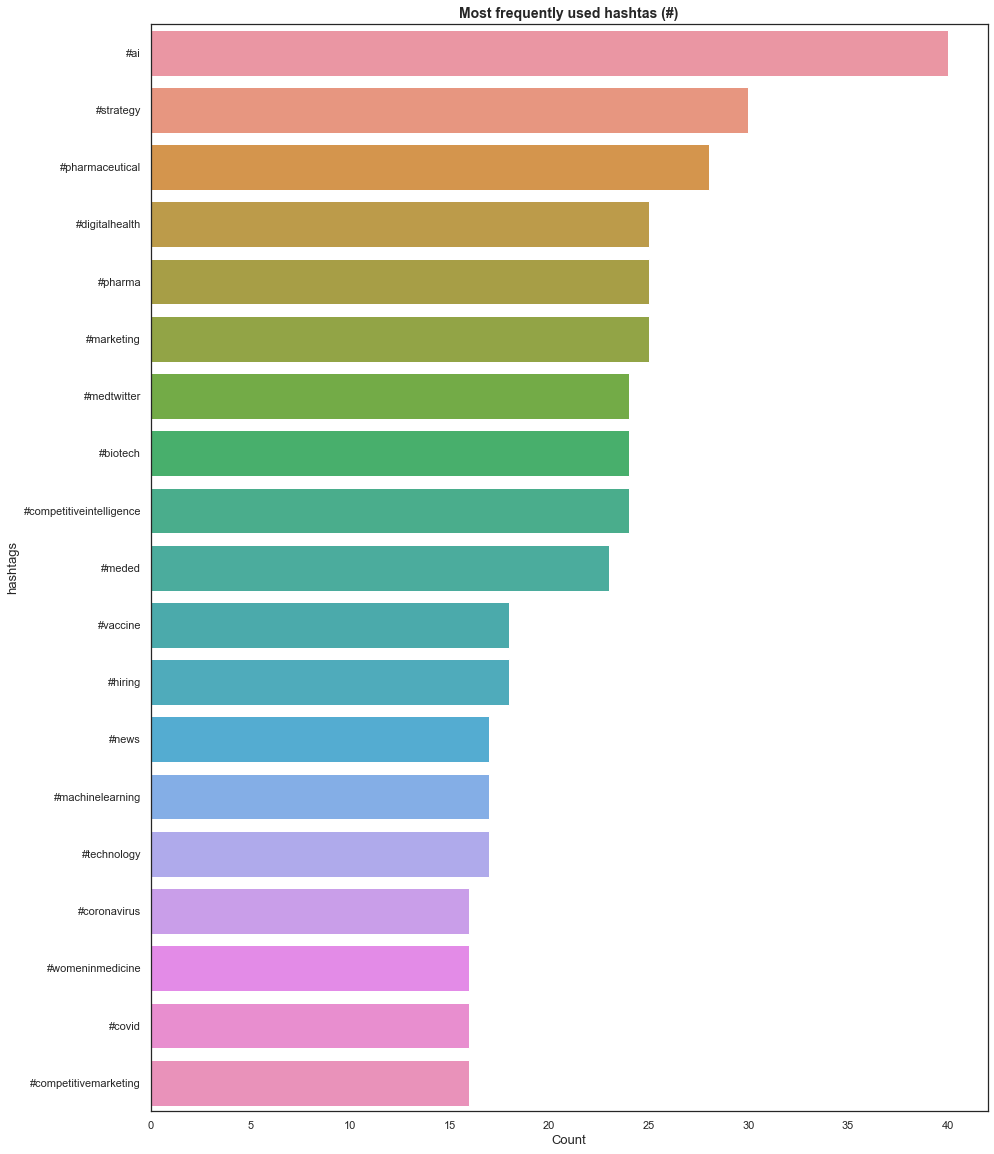

In [67]:
# Create a Seaborn barplot displaying the remaining most frequently used hastags (#).
plt.figure(figsize=(15, 20))
sns.barplot(x='count', y='word', data=hashtags_subset)

# Set axis labels and font styles.
plt.xlabel('Count', size=13)
plt.ylabel('hashtags', size=13)
plt.title('Most frequently used hashtas (#)', size=14, weight=600)


While the barplot indicates which hashtags are trending, a wordcloud is explored below to allow for a more intuitive approach to the Twitter discourse.

In [68]:
# Convert the tags list to a DataFrame.
hashtags_wordcloud = x.to_frame()
hashtags_wordcloud

,0
0,#healthcare
1,#premisehealth
2,#hiring
3,#healthcare
4,🚨#new:🚨
...,...
4328,#mediqueststaffing
4329,#hospital
4330,#shift
4331,(#newportbeach)


In [69]:
# Rename to column '0' to 'word'
hashtags_wordcloud = hashtags_wordcloud.rename(columns={0: 'word'})

# View the DataFrame
hashtags_wordcloud 

,word
0,#healthcare
1,#premisehealth
2,#hiring
3,#healthcare
4,🚨#new:🚨
...,...
4328,#mediqueststaffing
4329,#hospital
4330,#shift
4331,(#newportbeach)


In [70]:
# Removing overrepresented hashtags or those who do not add value bc of being too generic. 
hashtags_wordcloud_short = hashtags_wordcloud[(hashtags_wordcloud.word != '#healthcare') &
                                 (hashtags_wordcloud.word != '#healthcare.') &
                                 (hashtags_wordcloud.word != '#health') &
                                 (hashtags_wordcloud.word != '#medicine') &
                                 (hashtags_wordcloud.word != '#medical') &
                                 (hashtags_wordcloud.word != '#medical') &
                                 (hashtags_wordcloud.word != '#job')]    
# View the DataFrame.
hashtags_wordcloud_short

,word
1,#premisehealth
2,#hiring
4,🚨#new:🚨
5,look!\n\n#blogs
6,#digitaltransformation
...,...
4327,\n#csjmu
4328,#mediqueststaffing
4329,#hospital
4330,#shift


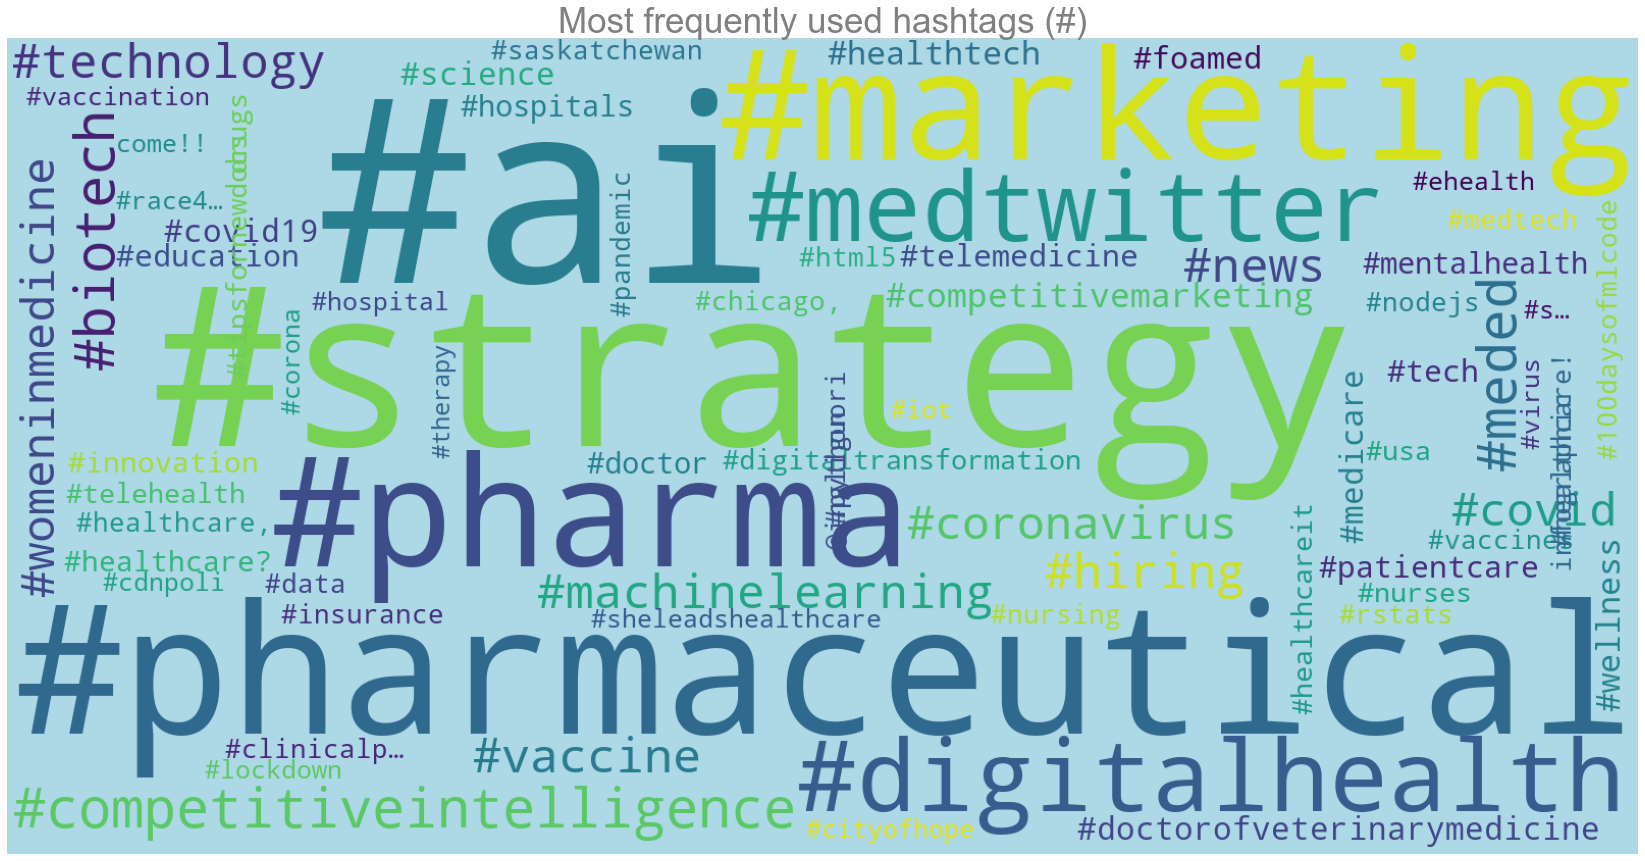

In [71]:
# Create a wordcloud.
hashtag_wc = hashtags_wordcloud_short['word'].value_counts().to_dict()
wc = WordCloud(width=1600, height=800, background_color="lightblue", max_words=70).generate_from_frequencies(hashtag_wc)

plt.figure( figsize=(30,15))
plt.title('Most frequently used hashtags (#)', size=35, color= 'grey', weight=200)
plt.imshow(wc)
plt.axis('off')
plt.show()

- Insight/Decision: Apart from more generic terms such as “#strategy”, the terms “#digitalhealth” and “#ai” represent topics of interest. On a more granular level, the topic of coronavirus seems to be important. Against this background, the decision is taken to contextualise the findings of this report using publicly available data of UK covid-19 cases.
- Limitations: While wordclouds are engaging and visually appealing, they should be applied with great caution for several reasons, e. g. even though words stand out according to frequency, the length of the words does affect their visibility and the choice of colours might obscure the importance, e. g. when more frequent words are displayed with lighter colours. There might also be issues with colour-blind biases. Due to the intuitive appeal of wordclouds, they were included in the presentation. However, the wordcloud should not be interpreted in isolation but in tandem with the bar chart before drawing conclusions.


**Read the following article from [(Driver 2022)](https://www.businessnewsdaily.com/7488-twitter-for-business.html) and determine how teams can use tweets to provide feedback to stakeholders, whether tweets add value to the overall project, and how the NHS can utilise tweets.**
- Tweets can be a great tool to provide stakeholders with direct feedback from end-users, the industry, and wider public, in this case NHS patients. Tweets provide info about public sentiment and trending topics related to a particular subject matter, product, or service. 
- Tweets/Twitter can add significant value to the NHS in two ways: First, to get feedback as described above and second, to proactively shape discourse and tailor services to customers' needs (e.g. through polls, advertisement) and to be a part of a wider discussion in the field of healthcare innovations. In addition, Twitter is a great tool to quickly share important info with the wider public which can be crucial e.g. during a pandemic. 
- It is important to respect GDPR policies and ethical considerations when working with social media data.

# Assignment activity 6: Make recommendations

 >  **This section explores the following:**  
 > - Should the NHS start looking at increasing staff levels?
 > - Has there been adequate staff and capacity in the networks?  
 > - What was the actual utilisation of resources?
 > - How do the healthcare professional types differ over time?
 > - Are there significant changes in whether or not visits are attended?
 > - Are there changes in terms of appointment type and the busiest months?
 > - Are there any trends in time between booking and appointment?
 > - How do the various service settings compare?

In [72]:
# Print the minimum date pertaining to the ar data set.
ar_min = ar['appointment_month'].min()
ar_min

'2020-01'

In [73]:
# Print the maximum date pertaining to the ar data set.
ar_max = ar['appointment_month'].max()
ar_max

'2022-06'

In [74]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_from_202108 = ar.loc[(ar['appointment_month']>= '2021-08')]

# View the DataFrame.
ar_from_202108

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [75]:
# Check whether the subset was filtered correctly by printing the minimum date. 
ar_from_202108_min = ar_from_202108['appointment_month'].min()
ar_from_202108_min

'2021-08'

The subset was filtered correctly starting from August 2021 onwards. 

**Question 1:** Should the NHS start looking at increasing staff levels? 

In [76]:
# Create an aggregated data set to review the different features.
# Drop the icb_ons_code column.
# Reset the index. 
ar_agg = ar_from_202108.drop('icb_ons_code', axis=1).reset_index()

# View the DataFrame.
ar_agg.head()

,index,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,3652,2021-08,Attended,GP,Face-to-Face,1 Day,6553
1,3653,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
2,3654,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3,3655,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
4,3656,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961


In [77]:
# Create a new DataFrame to group the ar_agg DataFrame columns and sum by count of appointments.
ar_agg2 = ar_agg.groupby(['appointment_month',
 'appointment_status',
 'hcp_type',
 'appointment_mode',
 'time_between_book_and_appointment'])\
[['count_of_appointments']].sum().reset_index()

# View the DataFrame.
ar_agg2

,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08,Attended,GP,Face-to-Face,1 Day,507835
1,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,194726
2,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,959486
3,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,102111
4,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,398772
...,...,...,...,...,...,...
3749,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,5494
3750,2022-06,Unknown,Unknown,Unknown,More than 28 Days,5115
3751,2022-06,Unknown,Unknown,Unknown,Same Day,1914
3752,2022-06,Unknown,Unknown,Unknown,Unknown / Data Quality,53


In [78]:
# Create a new DataFrame containing the appointment_month and count_of_appointments columns. 
# Determine the total number of appointments per month using the groupby() and sum() functions.
# Reset the index. 
ar_df = ar_agg2.groupby(['appointment_month'])['count_of_appointments'].sum().reset_index()

# View the DataFrame.
ar_df

,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776
5,2022-01,25635474
6,2022-02,25355260
7,2022-03,29595038
8,2022-04,23913060
9,2022-05,27495508


In [79]:
# Add a new column (average_utilisation) to the DataFrame indicating the average utilisation of service. 
# The average can be calculated by dividing the sum of the monthly appointments by 30 to get a daily value. 
ar_df['average_utilisation'] = ar_df['count_of_appointments'] / 30

# View the DataFrame
ar_df

,appointment_month,count_of_appointments,average_utilisation
0,2021-08,23852171,7.950724e+05
1,2021-09,28522501,9.507500e+05
2,2021-10,30303834,1.010128e+06
3,2021-11,30405070,1.013502e+06
4,2021-12,25140776,8.380259e+05
5,2022-01,25635474,8.545158e+05
6,2022-02,25355260,8.451753e+05
7,2022-03,29595038,9.865013e+05
8,2022-04,23913060,7.971020e+05
9,2022-05,27495508,9.165169e+05


In [80]:
# Round the value to one decimal place.
ar_df['average_utilisation'] = ar_df['average_utilisation'].apply(lambda x: round(x, 1))

# View the DataFrame.
ar_df

,appointment_month,count_of_appointments,average_utilisation
0,2021-08,23852171,795072.4
1,2021-09,28522501,950750.0
2,2021-10,30303834,1010127.8
3,2021-11,30405070,1013502.3
4,2021-12,25140776,838025.9
5,2022-01,25635474,854515.8
6,2022-02,25355260,845175.3
7,2022-03,29595038,986501.3
8,2022-04,23913060,797102.0
9,2022-05,27495508,916516.9


In [81]:
# Change the datatype of appointment_month for the ar_df DataFrame to string for ease of visualisation.
ar_df = ar_df.astype({'appointment_month':'string'})
ar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   appointment_month      11 non-null     string 
 1   count_of_appointments  11 non-null     int64  
 2   average_utilisation    11 non-null     float64
dtypes: float64(1), int64(1), string(1)
memory usage: 392.0 bytes


In [82]:
# Change the datatype of appointment_month for the ar_agg DataFrame to string for ease of visualisation.
ar_agg = ar_agg.astype({'appointment_month':'string'})
ar_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223418 entries, 0 to 223417
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   index                              223418 non-null  int64 
 1   appointment_month                  223418 non-null  string
 2   appointment_status                 223418 non-null  object
 3   hcp_type                           223418 non-null  object
 4   appointment_mode                   223418 non-null  object
 5   time_between_book_and_appointment  223418 non-null  object
 6   count_of_appointments              223418 non-null  int64 
dtypes: int64(2), object(4), string(1)
memory usage: 11.9+ MB


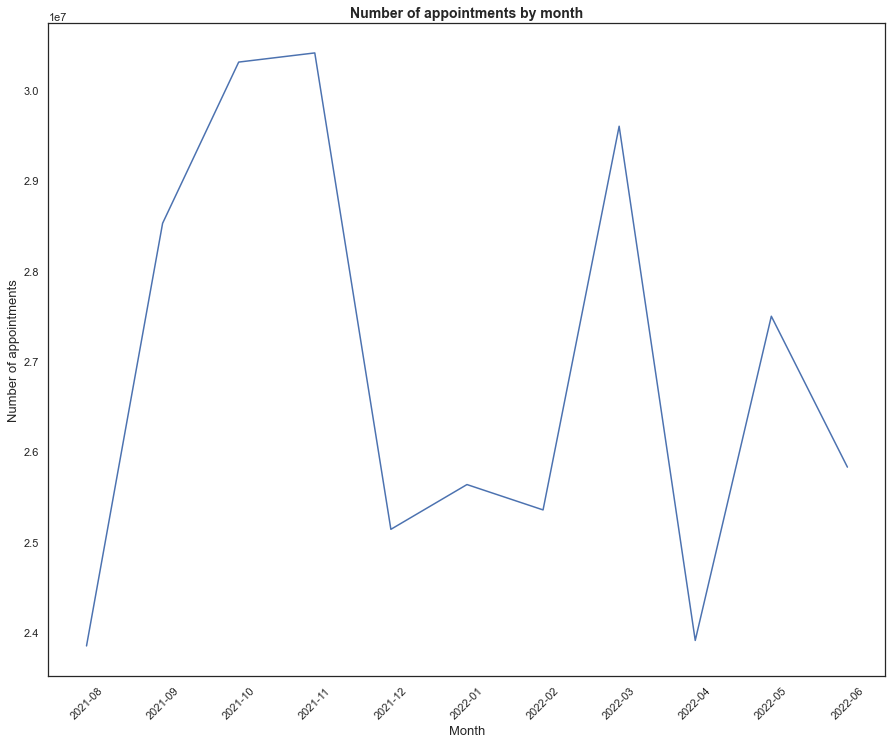

In [83]:
# Create a lineplot indicating the number of monthly visits.
graph = sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_df)

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Number of appointments', size=13)
plt.title('Number of appointments by month', size=14, weight=600)

# Show the plot.
plt.show()

The lineplot shows the highest number of oppointment in autumn 2021 followed by two smaller spikes in spring and summer 2022. Potential links with contextual data around the coronavirus are explored in the last section of this report. 

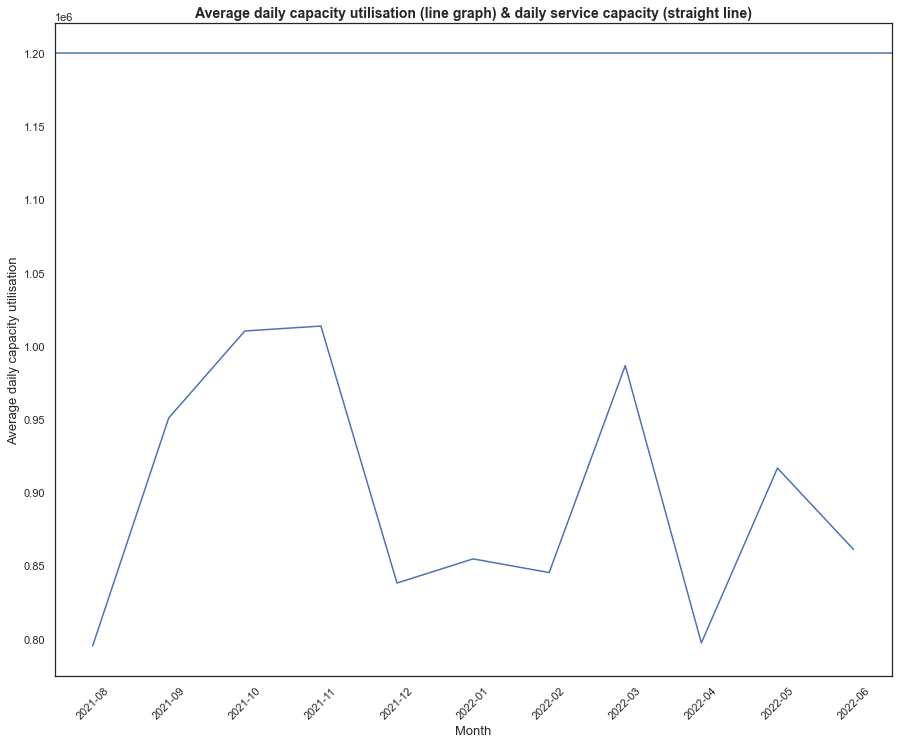

In [84]:
# Plot monthly capacity utilisation.
# Create a lineplot.
graph = sns.lineplot(x='appointment_month', y='average_utilisation', data=ar_df)

#Drawing a horizontal line at point 1.25
graph.axhline(1200000)

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Average daily capacity utilisation', size=13)
plt.title('Average daily capacity utilisation (line graph) & daily service capacity (straight line)', size=14, weight=600)

#The plot is shown
plt.show()

In [85]:
# Create a new column to show capacity utilisation in percent. 
ar_df['utilisation_%']= round(ar_df['count_of_appointments']/30/1200000*100,1)
ar_df

,appointment_month,count_of_appointments,average_utilisation,utilisation_%
0,2021-08,23852171,795072.4,66.3
1,2021-09,28522501,950750.0,79.2
2,2021-10,30303834,1010127.8,84.2
3,2021-11,30405070,1013502.3,84.5
4,2021-12,25140776,838025.9,69.8
5,2022-01,25635474,854515.8,71.2
6,2022-02,25355260,845175.3,70.4
7,2022-03,29595038,986501.3,82.2
8,2022-04,23913060,797102.0,66.4
9,2022-05,27495508,916516.9,76.4


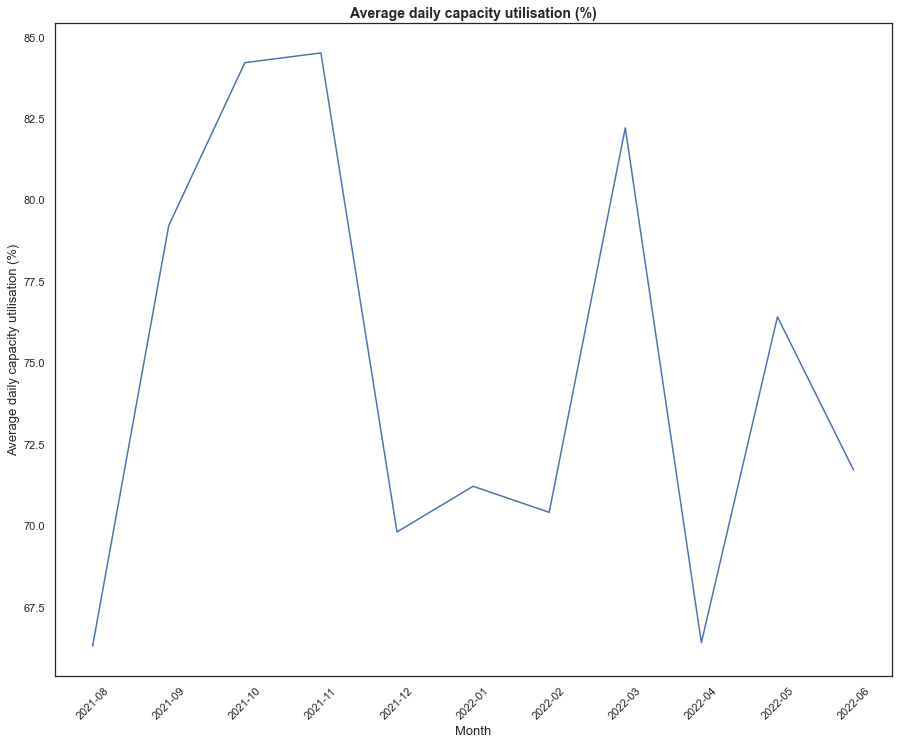

In [86]:
# Draw a lineplot showing the capacity utilisation in percent. 
ax=sns.lineplot(x='appointment_month', y= 'utilisation_%', data= ar_df)
ax.set(xlabel='Month', ylabel='Capacity utilisation')

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Average daily capacity utilisation (%)', size=13)
plt.title('Average daily capacity utilisation (%)', size=14, weight=600)

#The plot is shown
plt.show()

A central insight is that the highest average capacity utilisation is shortly below 85 % which shows that missed appointments are not due to an overutilisation of resources. 

**Question 2:** How do the healthcare professional types differ over time?

In [87]:
# Create a line plot to answer the question.
# Create a lineplot in Seaborn to answer the question.
# Specify the necessary variables and parameters.
# Healthcare professional type is displayed in the data set as hcp_type.
ar_agg

,index,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,3652,2021-08,Attended,GP,Face-to-Face,1 Day,6553
1,3653,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
2,3654,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3,3655,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
4,3656,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
223413,596816,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
223414,596817,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
223415,596818,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
223416,596819,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


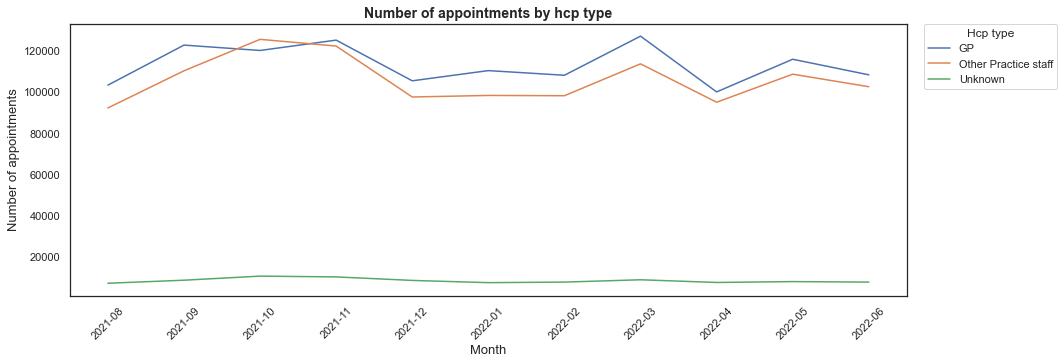

In [88]:
# Indicate the figure size to avoid scrolling the graph.
# When using the original figure size, the graph does not fit into the window.
plt.figure(figsize=(15,5))

sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_agg2, hue='hcp_type', ci=None)

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Number of appointments', size=13)
plt.title('Number of appointments by hcp type', size=14, weight=600)

# Place legend outside the plot and add legend titles.
plt.legend(title='Hcp type', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# Show the plot.
plt.show()

With the exception of autumn 2021, GP is the dominant hcp type, which further justifies looking more closely at GP data. 

**Question 3:** Are there significant changes in whether or not visits are attended?

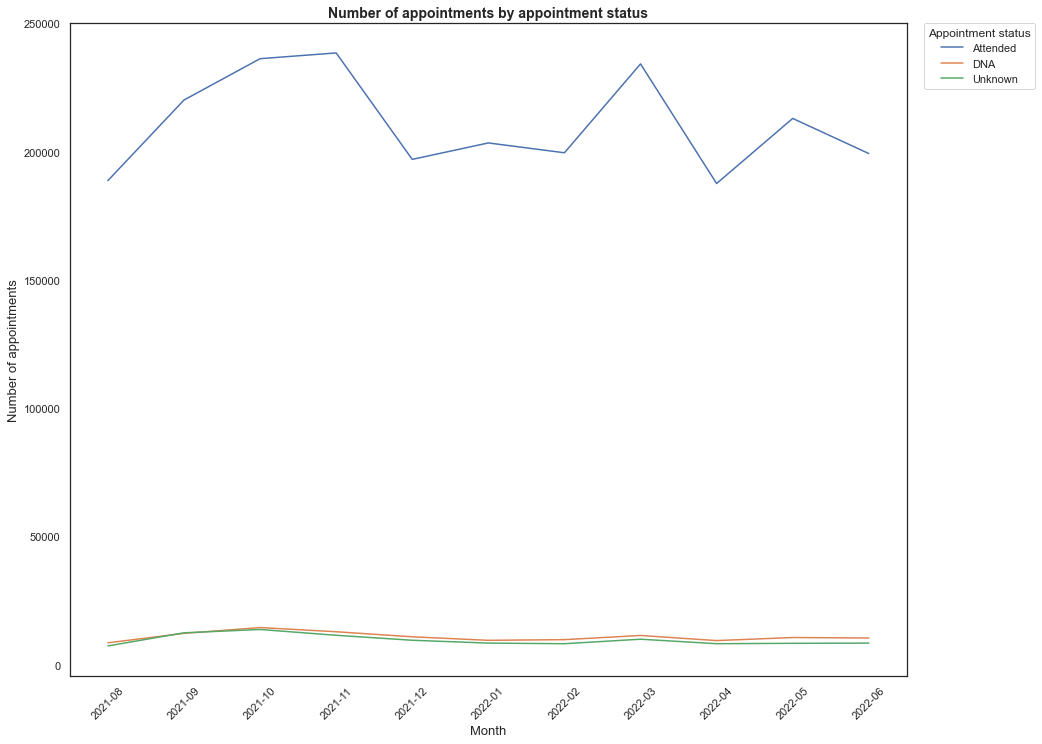

In [89]:
# Create a line plot to answer the question.
sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_agg2, hue='appointment_status', ci=None)

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Number of appointments', size=13)
plt.title('Number of appointments by appointment status', size=14, weight=600)

# Place legend outside the plot and add legend titles.
plt.legend(title='Appointment status', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# Show the plot.
plt.show()

Despite some fluctuations in the actual number of appointments, “Attended” represents the dominant appointment status between August 2021 and June 2022. This shows that whilst missed appointments do represent a problem, most of the appointments are still attended. 

**Question 4:** Are there changes in terms of appointment type and the busiest months?

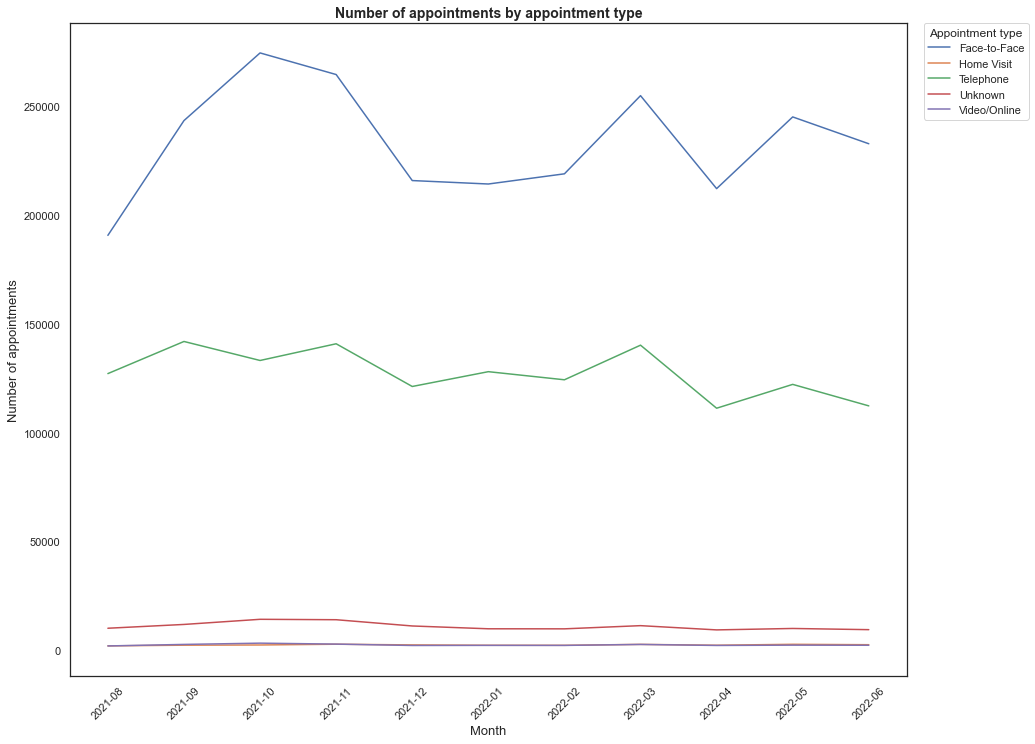

In [90]:
# Create a line plot to answer the question.
sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_agg2, hue='appointment_mode', ci=None)

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Number of appointments', size=13)
plt.title('Number of appointments by appointment type', size=14, weight=600)

# Place legend outside the plot and add legend titles.
plt.legend(title='Appointment type', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# Show the plot.
plt.show()

Over the entire time span of the DataFrame, Face-to-Face visits represent the dominant appointment type, followed by phone appointments. This can give insights on how to allocate staff capacity in the networks as there seems to be a high demand for personal or telephone appointments. 

**Question 5:** Are there any trends in time between booking an appointment?

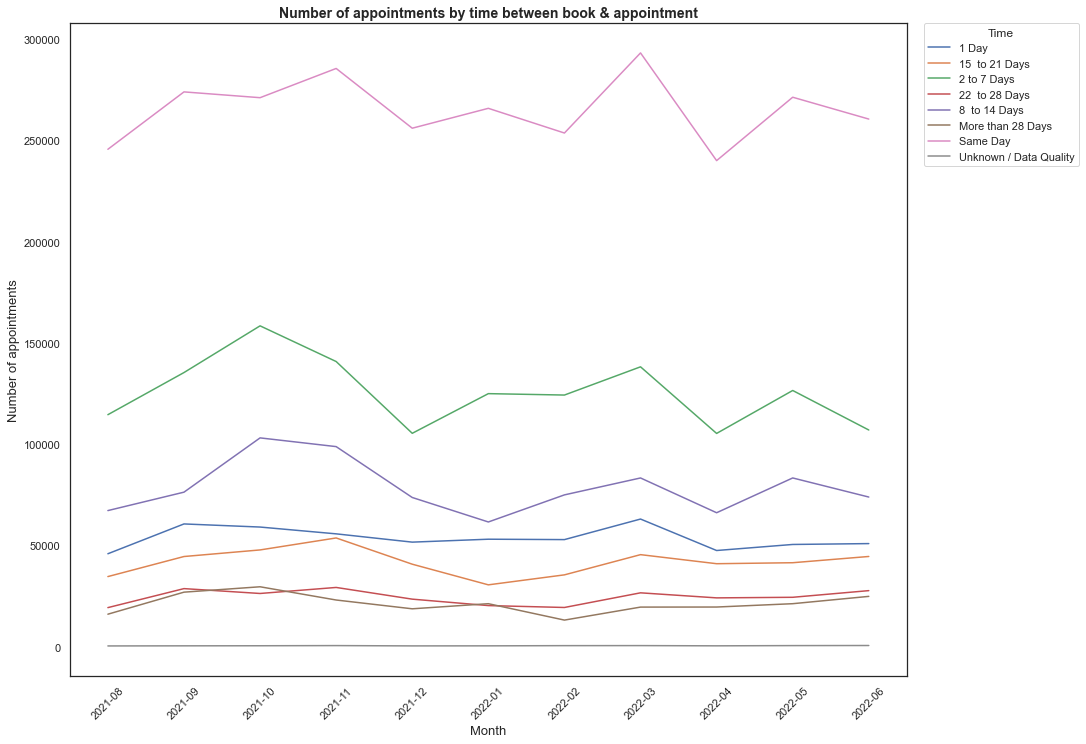

In [91]:
# Create a line plot to answer the question.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment', data=ar_agg2, ci=None)

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Number of appointments', size=13)
plt.title('Number of appointments by time between book & appointment', size=14, weight=600)

# Place legend outside the plot and add legend titles.
plt.legend(title='Time', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# Show the plot.
plt.show()

Most of the appointments are booked on the same day, which gives indications that people do look for short-term appointments. By incentivising people to cancel their appointments even with short notice, they might be booked on the same day by other patients. 

**Question 6:** How do the spread of service settings compare?

In [92]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [93]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_ss =nc.groupby(['appointment_month','service_setting'])[['count_of_appointments']].sum().reset_index()

# View the DataFrame.
nc_ss.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


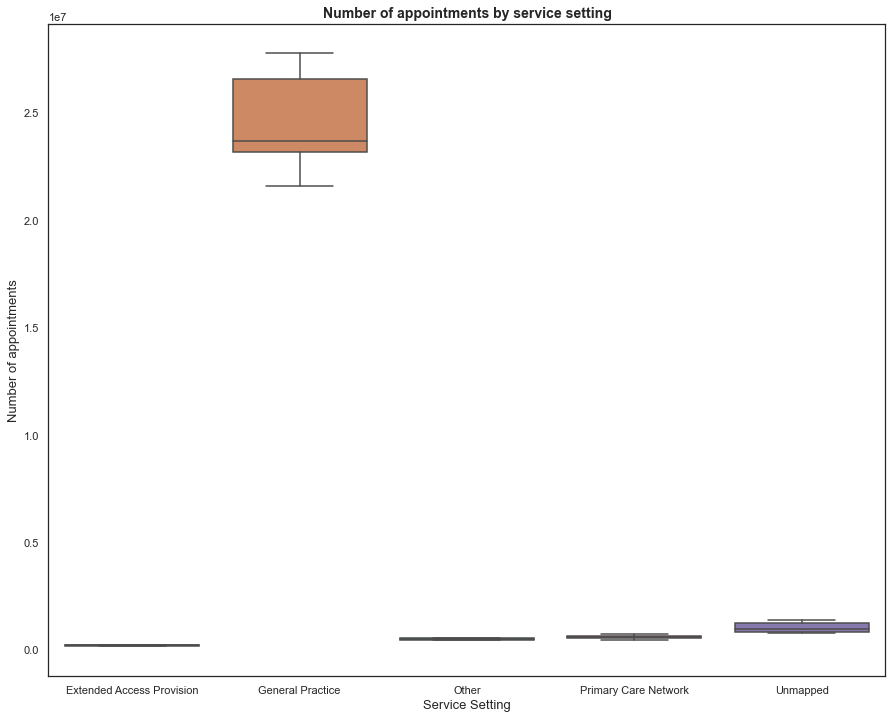

In [94]:
# Create a boxplot to investigate spread of service settings.
sns.boxplot(data=nc_ss, x='service_setting', y='count_of_appointments')

# Set axis labels and font styles.
plt.xlabel('Service Setting', size=13)
plt.ylabel('Number of appointments', size=13)
plt.title('Number of appointments by service setting', size=14, weight=600)

# Show the plot.
plt.show()

Since General Practice presents the highester number of appointments it is excluded from the analysis to allow for more granular insights to emerge concerning the other service settings.

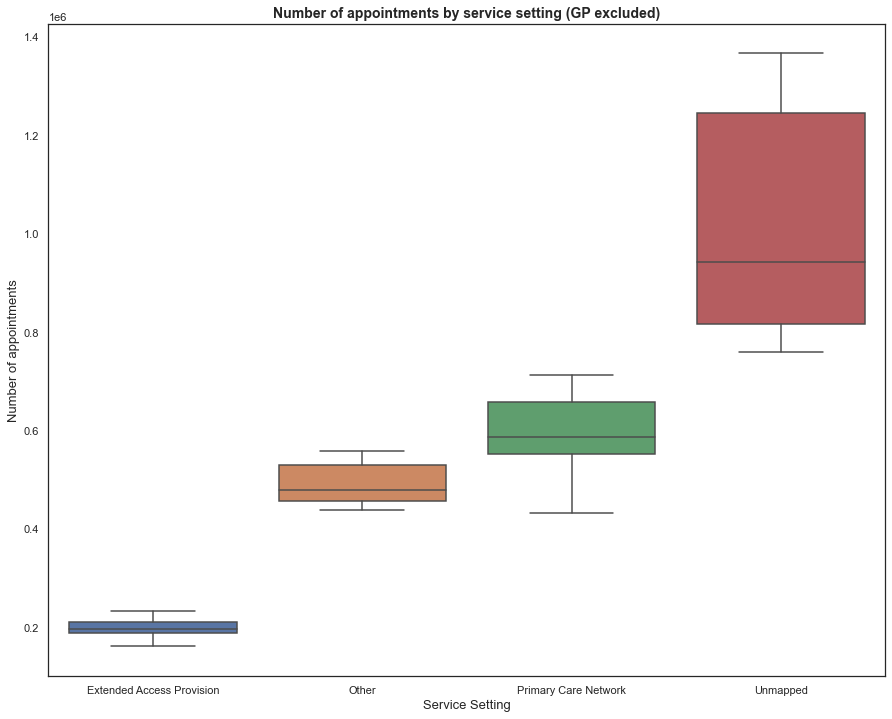

In [95]:
# Create a boxplot to investigate the service settings without GP.
sns.boxplot(data=nc_ss[nc_ss['service_setting'] !='General Practice'], x='service_setting', y='count_of_appointments')

# Set axis labels and font styles.
plt.xlabel('Service Setting', size=13)
plt.ylabel('Number of appointments', size=13)
plt.title('Number of appointments by service setting (GP excluded)', size=14, weight=600)

# Show the plot.
plt.show()

Even though the template suggested a boxplot, it should be noted that while a boxplot summarises the distribution of a variable, it does not show the multimodality and other characteristics of distributions and thus compromises the actual comparison between data sets. Therefore, a boxplot with jitter and a violinplot were explored instead. The service setting GP was excluded as it skewed the graph and did not allow for insights about the other service settings. 

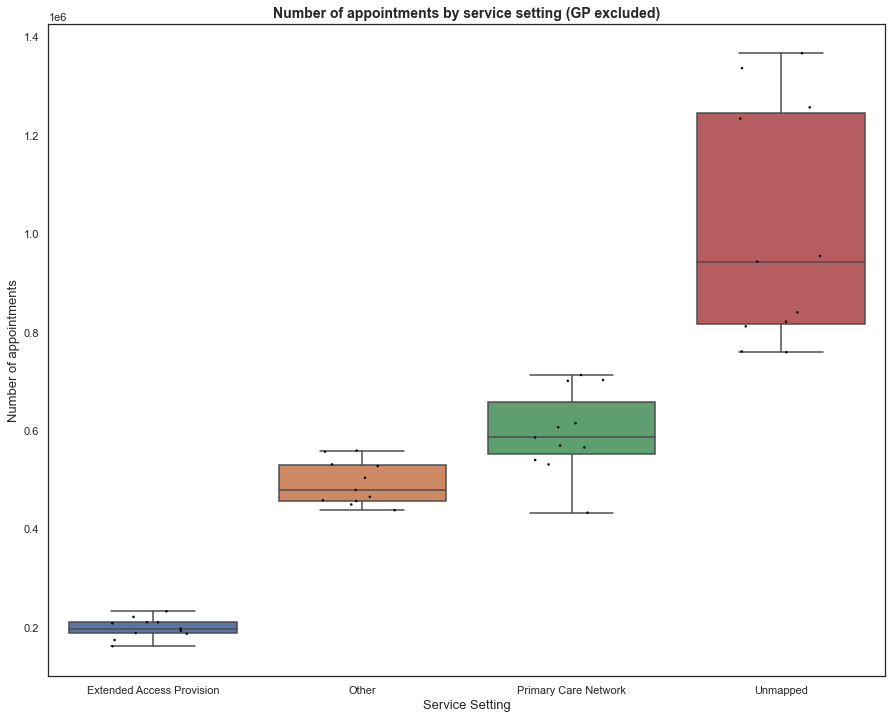

In [96]:
# Create a boxplot to investigate the service settings without GP.
# Add jitter by creating a stripplot to better show the underlying distribution of the data.
sns.boxplot(data=nc_ss[nc_ss['service_setting'] !='General Practice'], x='service_setting', y='count_of_appointments')
sns.stripplot(data=nc_ss[nc_ss['service_setting'] !='General Practice'], x='service_setting',\
              y='count_of_appointments', color="black", jitter=0.2, size=2.5)

# Set axis labels and font styles.
plt.xlabel('Service Setting', size=13)
plt.ylabel('Number of appointments', size=13)
plt.title('Number of appointments by service setting (GP excluded)', size=14, weight=600)


# Show the plot.
plt.show()

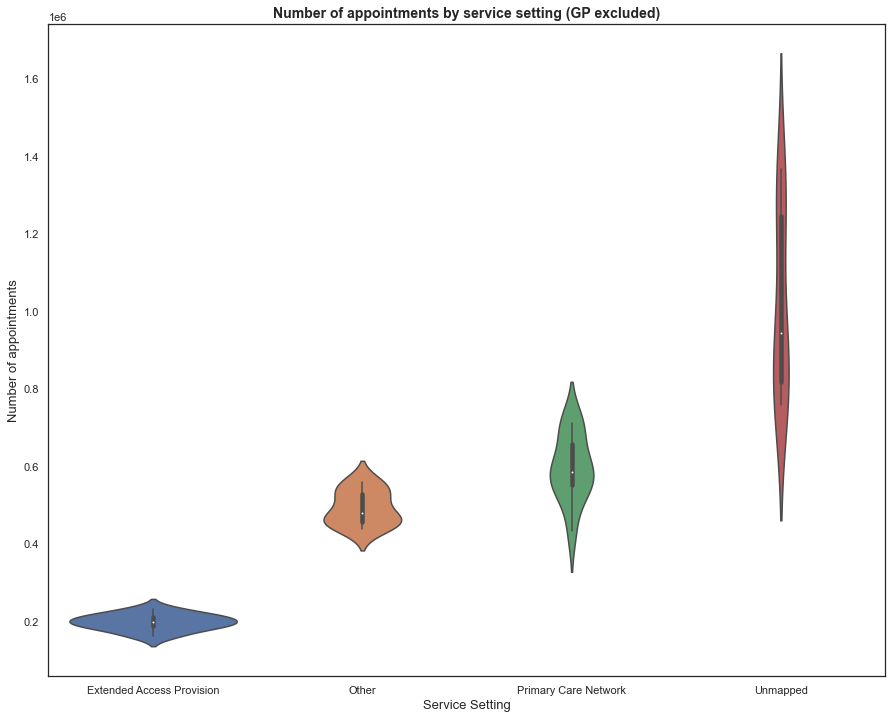

In [97]:
# Create a violinplot to investigate spread of service settings to better show the distribution of the data.
sns.violinplot(data=nc_ss[nc_ss['service_setting'] !='General Practice'], x='service_setting', y='count_of_appointments')

# Set axis labels and font styles.
plt.xlabel('Service Setting', size=13)
plt.ylabel('Number of appointments', size=13)
plt.title('Number of appointments by service setting (GP excluded)', size=14, weight=600)


# Show the plot.
plt.show()

What stands out from the jitter boxplot and violinplot is the large group of unmapped data. It is recommended to tailor resource utilisation towards improving the accuracy of records by e.g. staff training. 

### Additional contextual analysis

Given the topic cluster around the coronavirus emerging from the wordcloud and barplot, the decision was taken to import an additional dataset of new covid-19 cases in the UK from [(statista, 2022)](https://www.statista.com/statistics/1101947/coronavirus-cases-development-uk/).

In [98]:
# Import the data set showing new covid 19 cases in the UK. 
covid_cases_uk = pd.read_excel('covid_cases_uk.xlsx')

# View the DataFrame
covid_cases_uk

,month,covid_19_cases
0,2020-02,1
1,2020-02,1
2,2020-02,19
3,2020-02,1
4,2020-02,3
...,...,...
864,2022-06,18346
865,2022-06,16794
866,2022-06,20775
867,2022-06,25101


In [99]:
# Determine number of rows and columns.
print(covid_cases_uk.shape)

(869, 2)


The data set consists of 869 rows and two columns.

In [100]:
# Determine whether there are missing values.
covid_cases_uk.isna().sum()

month             0
covid_19_cases    0
dtype: int64

There are no missing values in the data set. 

In [101]:
# Determine descriptive statistics.
covid_cases_uk.describe()

,covid_19_cases
count,869.000000
mean,26148.363636
std,34659.673163
min,1.000000
25%,3092.000000
50%,14735.000000
75%,36476.000000
max,275647.000000


The descriptive statistics displayed above provide info about the count, mean, standard deviation (std), minimum and maximum values (min, max), as well IQR values (25%, 50%, 75%).

In [102]:
# Group the DataFrame by month and sum by covid-19 cases.
covid_grouped = covid_cases_uk.groupby(['month'])[['covid_19_cases']].sum().reset_index()

# View the DataFrame.
covid_grouped.head()

,month,covid_19_cases
0,2020-02,57
1,2020-03,29315
2,2020-04,137022
3,2020-05,87825
4,2020-06,29200


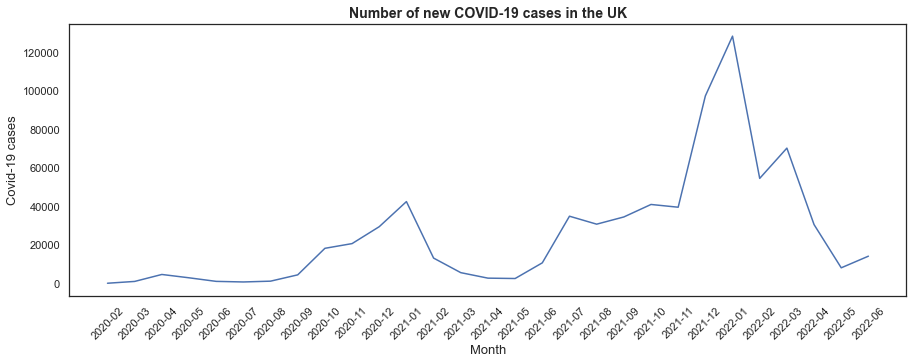

In [103]:
# Plot number of new coronavirus cases in the UK by month.
# Indicate figure size. 
plt.figure(figsize=(15,5))

# Create line graph using Seaborn.
sns.lineplot(x='month', y='covid_19_cases', data=covid_cases_uk, ci=None)

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Covid-19 cases', size=13)
plt.title('Number of new COVID-19 cases in the UK', size=14, weight=600)

# Show the plot.
plt.show()

In [104]:
# Create a new Data Frame by filtering the ar DataFrame for GP appointments.
ar_gp = ar[ar['hcp_type'] == 'GP']

# View the DataFrame.
ar_gp

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596772,E54000050,2022-06,Unknown,GP,Telephone,2 to 7 Days,31
596773,E54000050,2022-06,Unknown,GP,Telephone,22 to 28 Days,12
596774,E54000050,2022-06,Unknown,GP,Telephone,8 to 14 Days,33
596775,E54000050,2022-06,Unknown,GP,Telephone,More than 28 Days,9


In [105]:
# Group the DataFrame and sum by count_of_appointments column. 
ar_gp_grouped = ar_gp.groupby(['icb_ons_code',\
                               'appointment_month',\
                               'appointment_status',\
                               'hcp_type',\
                               'appointment_mode',\
                               'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()
# View the DataFrame.
ar_gp_grouped

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000008,2020-01,Attended,GP,Face-to-Face,1 Day,32181
1,E54000008,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,23190
2,E54000008,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,83788
3,E54000008,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,16172
4,E54000008,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,53405
...,...,...,...,...,...,...,...
110043,E54000062,2022-06,Unknown,GP,Telephone,Unknown / Data Quality,3
110044,E54000062,2022-06,Unknown,GP,Unknown,22 to 28 Days,1
110045,E54000062,2022-06,Unknown,GP,Video/Online,2 to 7 Days,2
110046,E54000062,2022-06,Unknown,GP,Video/Online,8 to 14 Days,1


In [106]:
# Create a new DataFarme by filtering the ar_gp DataFrame for attended appointments.
ar_gp_A = ar_gp_grouped[ar_gp_grouped['appointment_status'] == 'Attended']

# View the DataFrame.
ar_gp_A

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000008,2020-01,Attended,GP,Face-to-Face,1 Day,32181
1,E54000008,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,23190
2,E54000008,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,83788
3,E54000008,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,16172
4,E54000008,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,53405
...,...,...,...,...,...,...,...
109985,E54000062,2022-06,Attended,GP,Video/Online,2 to 7 Days,212
109986,E54000062,2022-06,Attended,GP,Video/Online,22 to 28 Days,76
109987,E54000062,2022-06,Attended,GP,Video/Online,8 to 14 Days,193
109988,E54000062,2022-06,Attended,GP,Video/Online,More than 28 Days,176


In [107]:
# Create a new DataFarme by filtering the ar_gp DataFrame for not attended appointments.
ar_gp_DNA = ar_gp_grouped[ar_gp_grouped['appointment_status'] == 'DNA']

# View the DataFrame.
ar_gp_DNA

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
39,E54000008,2020-01,DNA,GP,Face-to-Face,1 Day,1750
40,E54000008,2020-01,DNA,GP,Face-to-Face,15 to 21 Days,1892
41,E54000008,2020-01,DNA,GP,Face-to-Face,2 to 7 Days,5952
42,E54000008,2020-01,DNA,GP,Face-to-Face,22 to 28 Days,1277
43,E54000008,2020-01,DNA,GP,Face-to-Face,8 to 14 Days,4115
...,...,...,...,...,...,...,...
110015,E54000062,2022-06,DNA,GP,Video/Online,2 to 7 Days,2
110016,E54000062,2022-06,DNA,GP,Video/Online,22 to 28 Days,3
110017,E54000062,2022-06,DNA,GP,Video/Online,8 to 14 Days,3
110018,E54000062,2022-06,DNA,GP,Video/Online,More than 28 Days,2


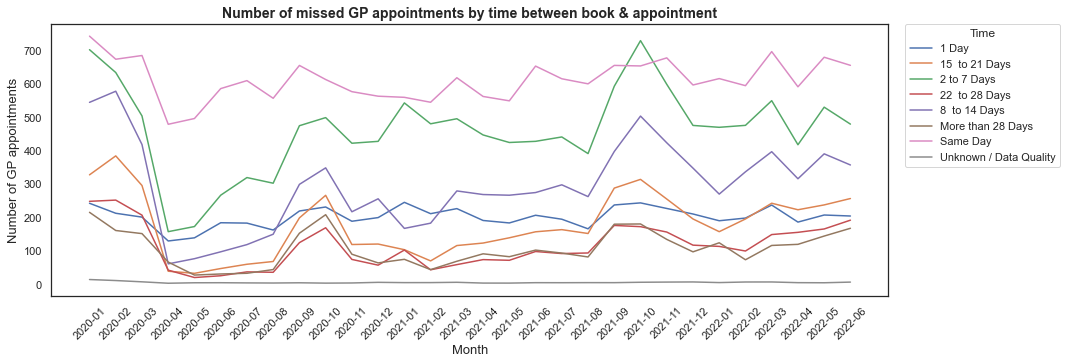

In [108]:
# Indicate the figure size.
plt.figure(figsize=(15,5))

# Create a line graph indicating the number of missed GP appointments by time between book & appointment.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment', data=ar_gp_DNA, ci=None)

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Number of GP appointments', size=13)
plt.title('Number of missed GP appointments by time between book & appointment', size=14, weight=600)

# Place legend outside the plot and add legend titles.
plt.legend(title='Time', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# Show the plot.
plt.show()

This shows that most of the missed GP appointments were booked on the same day.

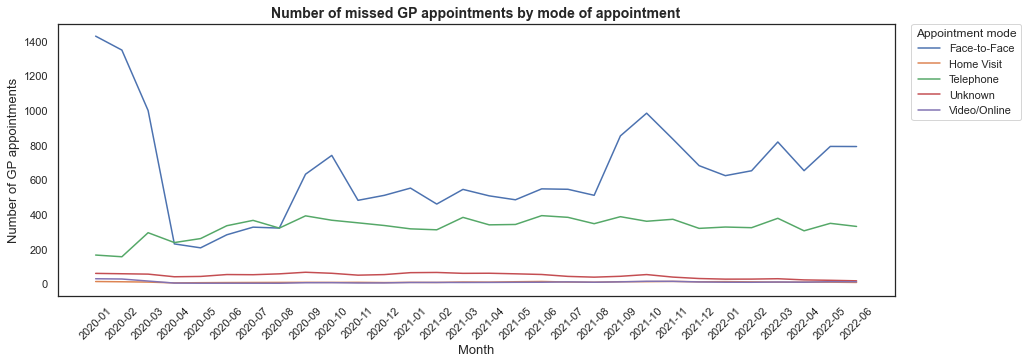

In [109]:
# Indicate figure size.
plt.figure(figsize=(15,5))

# Create a line graph indicating the number of missed GP appointments by mode of appointment.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode', data=ar_gp_DNA, ci=None)

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Number of GP appointments', size=13)
plt.title('Number of missed GP appointments by mode of appointment', size=14, weight=600)

# Place legend outside the plot and add legend titles.
plt.legend(title='Appointment mode', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# Show the plot.
plt.show()

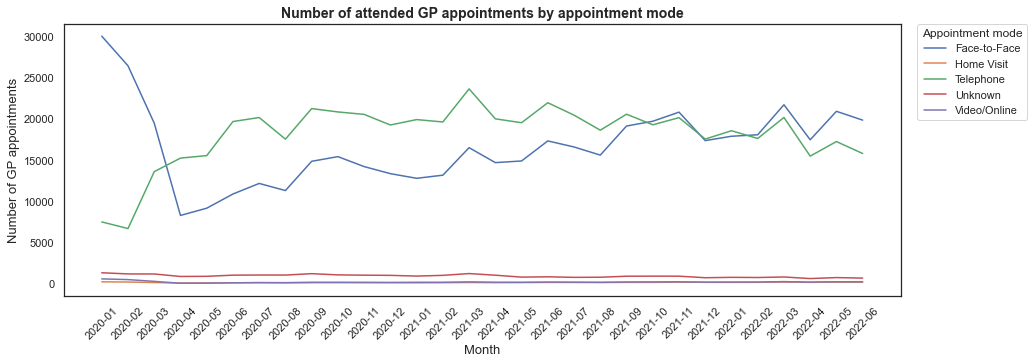

In [110]:
# Indicate the figure size. 
plt.figure(figsize=(15,5))

# Create a line graph indicating the number of attended GP appointments by mode of appointment.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode', data=ar_gp_A, ci=None)

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Number of GP appointments', size=13)
plt.title('Number of attended GP appointments by appointment mode', size=14, weight=600)

# Place legend outside the plot and add legend titles.
plt.legend(title='Appointment mode', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# Show the plot.
plt.show()

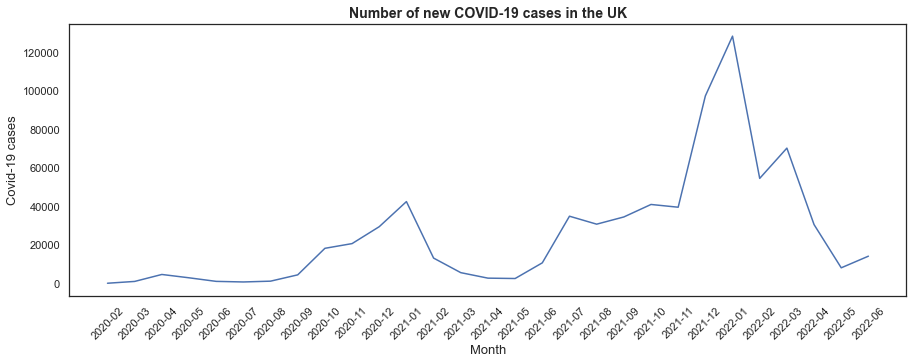

In [111]:
# To better understand the insights below, plot number of new coronavirus cases in the UK by month again.
# Indicate figure size. 
plt.figure(figsize=(15,5))

# Create line graph using Seaborn.
sns.lineplot(x='month', y='covid_19_cases', data=covid_cases_uk, ci=None)

# Set axis labels and font styles.
plt.xlabel('Month', size=13)
plt.xticks(rotation=45)
plt.ylabel('Covid-19 cases', size=13)
plt.title('Number of new COVID-19 cases in the UK', size=14, weight=600)

# Show the plot.
plt.show()

> - Insights: This allows for fascinating insights: It is precisely when new waves of UK covid-19 cases started to surge in August/September 2020, October/November 2021, and briefly again in February/March 2022 that spikes in missed GP appointments become visible. It can also be assumed that covid-19 changed the patients’ behaviour by indicting a switch to a preference for telephone GP appointments starting in Spring 2020 initiated by a stark drop in Face-to-Face appointments. Only in autumn 2021, Face-to-Face and phone appointments were at the same level again followed by a slight surplus of Face-to-Face appointments from early 2022 onwards.


### Provide a summary of your findings and recommendations based on the analysis.

> - Overall, most of the appointments were attended and the data suggests an average daily capacity utilisation of less than 85 %. The data did not allow for conclusions about whether there was adequate staff in the networks. More data e.g. about staff allocation across different locations is needed. In addition, analysing more historical data will help to accurately identify trends across seasons.
> - The data analysis reveals that the missed GP appointments throughout the past two years might have occurred in the context of the coronavirus pandemic. It is recommended not to penalise patients. Instead, it is recommended to tailor services to the preferences of patients, who e.g. showed a preference for telephone GP appointments throughout the pandemic. 
> - Due to an emerging trend of Twitter discourse around digitalisation and digital health, it is recommended to explore digital options to incentivise patients to attend their appointments, e.g. by sending out automatic reminders or by informing patients who wait for appointments once free slots become available, as most of the appointments were booked on the same day.
> - In addition, the analysis revealed a large amount of unmapped data.  To allow for even stronger insights in the future, improved data literacy among staff and coherent data entry policies are encouraged to reduce the number of unmapped entries. 
